[![Open in Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nishani53/Khanal_MSc_Thesis_MSU/blob/main/Khanal_MSU_project_market_change_1980s-2020s/Khanal_MSU_project_market_coverage_change_1980s-2020s.ipynb)


**Prepared by Naresh Khanal**  
Forest Economics Lab, Michigan State University  
February 01, 2025  
Khanalna@msu.edu

# 🧭 Forest Market Footprint Change in Michigan (1980s–2020s)

This analysis evaluates **how the spatial extent of forest product markets has changed across Michigan** from the **1980s through 2023**. By combining mill procurement zones for all major forest products into **decade-wide market coverage maps**, and comparing those across time, this project identifies where markets were **retained**, **lost**, or **gained**.

---

## 📌 Objective

To understand long-term market trends by analyzing the **presence and shifts in overall procurement coverage**, rather than competition intensity.

---

## 🪵 Forest Products Included

- 🌳 Hardwood Sawlogs  
- 🌲 Softwood Sawlogs  
- 🧻 Pulpwood  
- 🔥 Wood Biomass  

Each product’s procurement zone (based on haul distance/time) was merged to form **comprehensive market coverage** per decade.

---

## 🔍 Key Spatial Categories

By comparing the combined market zones from earlier decades to 2023, we identify:

| Category | Description |
|----------|-------------|
| 🟩 **Market Retained** | Areas that were within market zones in previous decades and remained so in 2023. |
| 🟥 **Market Loss**     | Areas that were within historical market zones but are no longer served in 2023. |
| 🟦 **Market Gained**   | New areas included in the 2023 market zone that were not previously served. |

These categories help evaluate the **geographic stability, contraction, or expansion** of the industry over time.

---

## 🛠️ Methodology Summary

1. **Dissolve** all forest product zones per decade into a single market footprint.
2. **Overlay** historical and 2023 market polygons using spatial operations.
3. Classify areas into retained, lost, or gained categories.
4. Output maps for visualization and spatial analysis.

### Tools Used

- **Python**
- **GeoPandas**
- **Shapely**
- **Fiona**
- **Matplotlib**

---

## 🗂️ Time Periods Compared

Market changes were analyzed across the following decades:

- 📼 **1980s**
- 📀 **1990s**
- 💾 **2000s**
- 💻 **2010s**
- 📱 **2023 (Current)**

---

## 📈 Use Cases

- Identifying areas of long-term market resilience or decline  
- Planning outreach or investment in newly gained or underserved regions  
- Supporting infrastructure, forest access, and policy decisions  
- Understanding long-term forest industry dynamics in Michigan

---

## 📧 Contact

For access to maps, spatial datasets, or further collaboration:

**Naresh Khanal**  
✉️ [khanalna@msu.edu](mailto:khanalna@msu.edu)  
📍 Michigan State University

---

## 📎 License

This analysis is intended for **academic and research use only**.  
Please contact the author before redistribution or reuse.


**Download the necessary Libraries**

In [1]:
!pip install geopandas fiona
!pip install matplotlib-scalebar
!pip install gdown
!pip install pydrive
!pip install matplotlib-scalebar


# Market change MAPS

# Change between 1985 and 2023

# Biomass

C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\611273774.py:27: UserWarning: `keep_geom_type=True` in overlay resulted in 90 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\611273774.py:68: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


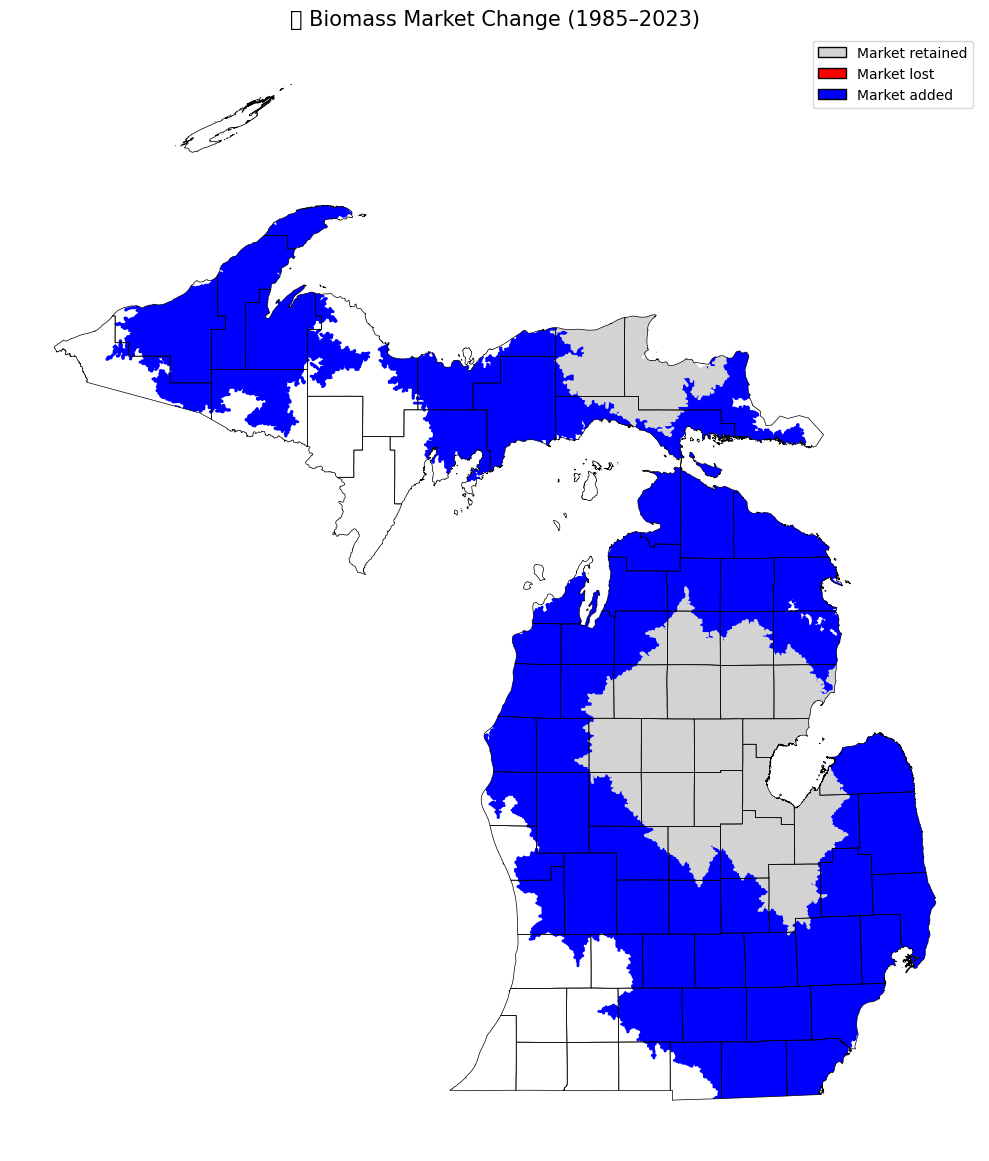

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch

# === File paths ===
base_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps"

michigan_path = os.path.join(base_dir, "michigan_counties.shp")
path_1985 = os.path.join(base_dir, "biomass_1985.shp")
path_2023 = os.path.join(base_dir, "biomass_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g85 = gpd.read_file(path_1985)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g85 = g85.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom85 = gpd.overlay(g85.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom85.intersection(geom23)
lost_geom = geom85.difference(geom23)
added_geom = geom23.difference(geom85)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)

retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

# === Legend styling
legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)

# === Title and appearance
ax.set_title("📉 Biomass Market Change (1985–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()


C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\921142057.py:28: UserWarning: `keep_geom_type=True` in overlay resulted in 90 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\921142057.py:68: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


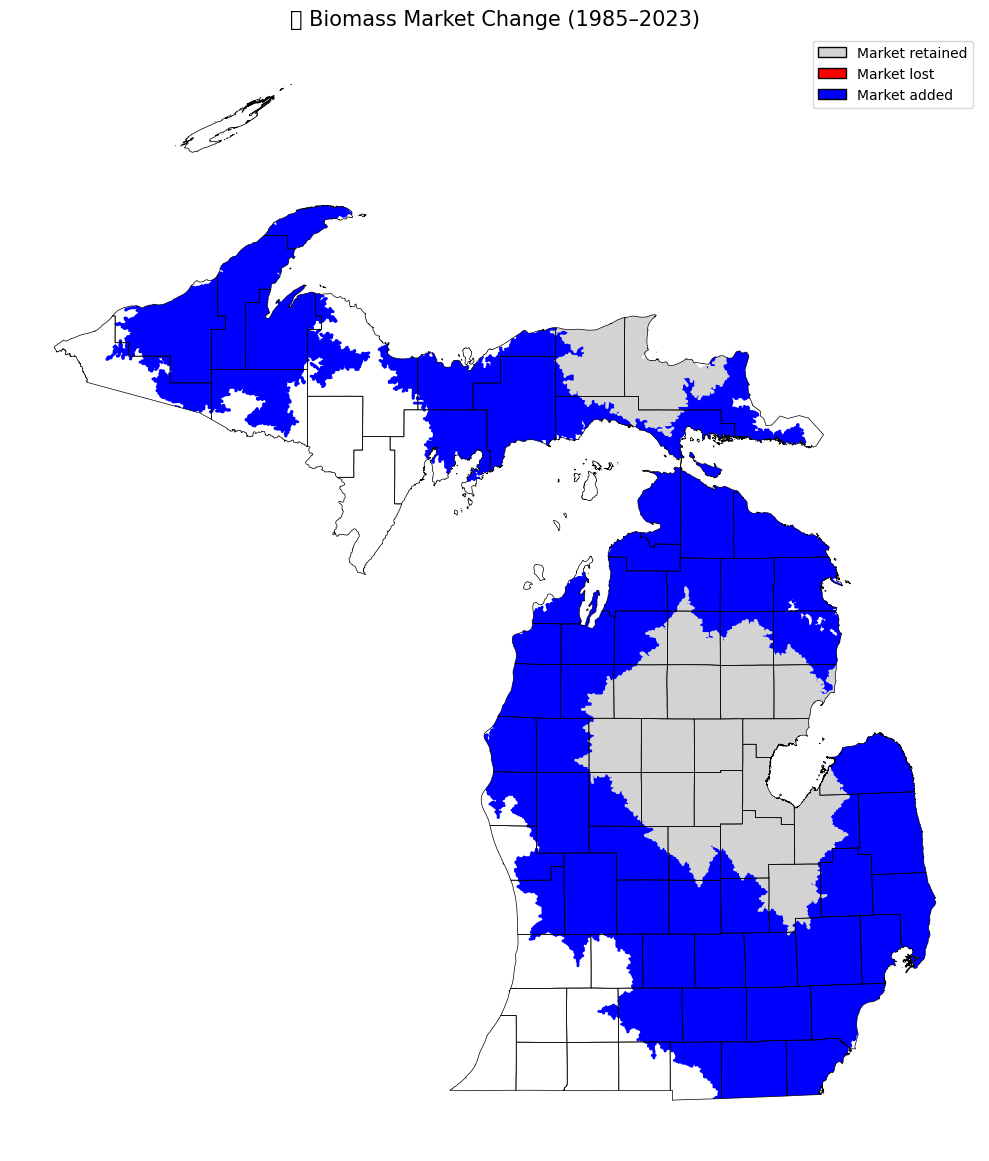

✅ Shapefiles saved:
- C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\biomass_market_retained_1985_2023.shp
- C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\biomass_market_lost_1985_2023.shp
- C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\biomass_market_added_1985_2023.shp


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os

# === File paths ===
base_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps"

michigan_path = os.path.join(base_dir, "michigan_counties.shp")
path_1985 = os.path.join(base_dir, "biomass_1985.shp")
path_2023 = os.path.join(base_dir, "biomass_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g85 = gpd.read_file(path_1985)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g85 = g85.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom85 = gpd.overlay(g85.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom85.intersection(geom23)
lost_geom = geom85.difference(geom23)
added_geom = geom23.difference(geom85)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

# === Legend styling
legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)

# === Title and appearance
ax.set_title("📉 Biomass Market Change (1985–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()

# # === Save individual market change shapefiles ===
# output_change_dir = os.path.join(base_dir, "Market_Change_SHP")
# os.makedirs(output_change_dir, exist_ok=True)

# product = "biomass"
# year1 = "1985"
# year2 = "2023"

# retained_fp = os.path.join(output_change_dir, f"{product}_market_retained_{year1}_{year2}.shp")
# lost_fp     = os.path.join(output_change_dir, f"{product}_market_lost_{year1}_{year2}.shp")
# added_fp    = os.path.join(output_change_dir, f"{product}_market_added_{year1}_{year2}.shp")

# retained.to_file(retained_fp)
# lost.to_file(lost_fp)
# added.to_file(added_fp)

# print(f"✅ Shapefiles saved:\n- {retained_fp}\n- {lost_fp}\n- {added_fp}")


C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\1837139736.py:28: UserWarning: `keep_geom_type=True` in overlay resulted in 90 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\1837139736.py:69: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


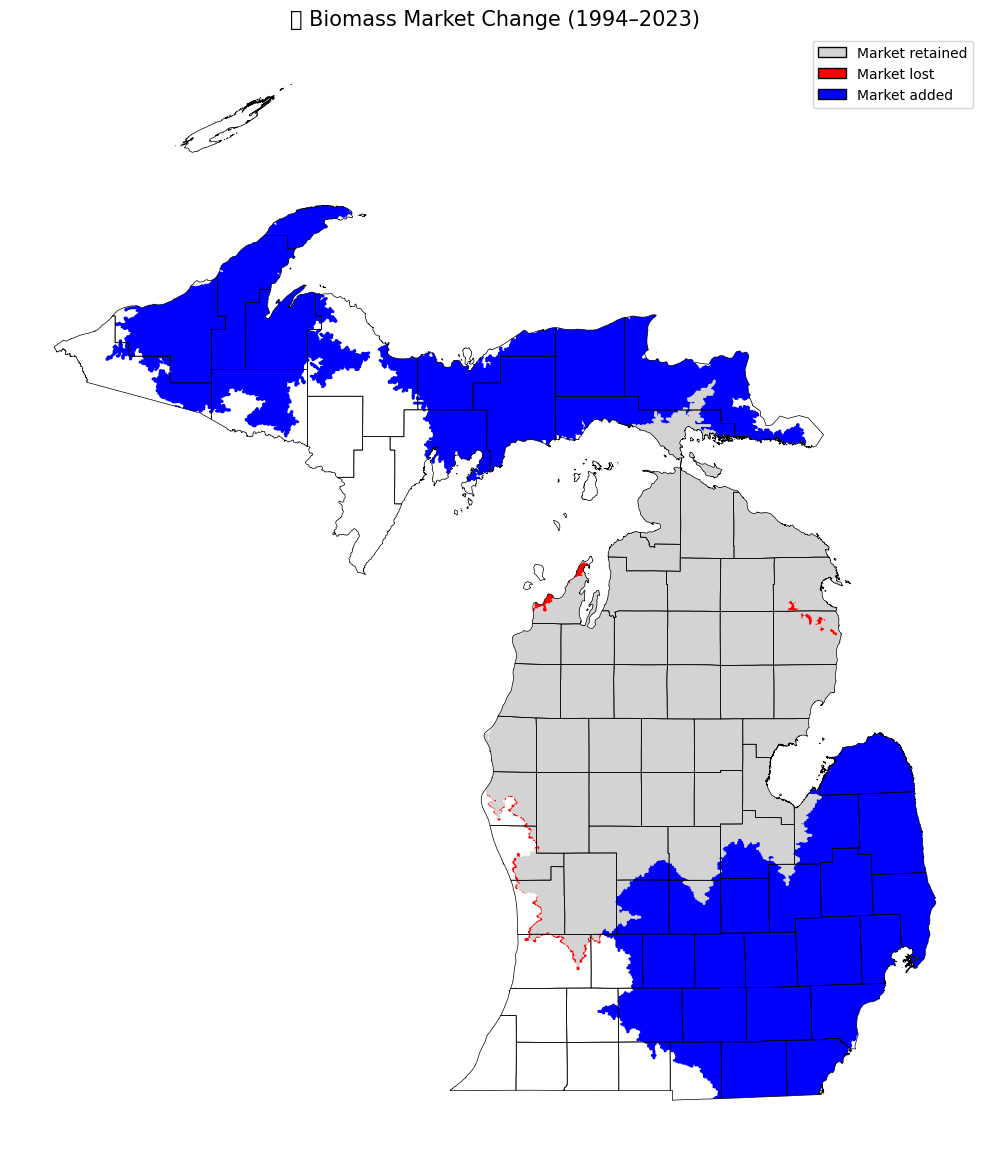

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os

# === File paths ===
base_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps"

michigan_path = os.path.join(base_dir, "michigan_counties.shp")
path_1994 = os.path.join(base_dir, "biomass_1994.shp")
path_2023 = os.path.join(base_dir, "biomass_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g94 = gpd.read_file(path_1994)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g94 = g94.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom94 = gpd.overlay(g94.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom94.intersection(geom23)
lost_geom = geom94.difference(geom23)
added_geom = geom23.difference(geom94)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)

retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

# === Legend styling
legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)

# === Title and appearance
ax.set_title("📉 Biomass Market Change (1994–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()


In [34]:
from shapely.geometry import Polygon, MultiPolygon

def clean_and_save(gdf, filepath):
    # Explode multiparts and geometry collections
    gdf_exploded = gdf.explode(index_parts=False)
    
    # Filter for Polygon and MultiPolygon only
    gdf_clean = gdf_exploded[gdf_exploded.geometry.type.isin(["Polygon", "MultiPolygon"])]

    # Save to file
    if not gdf_clean.empty:
        gdf_clean.to_file(filepath)
    else:
        print(f"⚠️ Skipped saving {filepath} (empty after filtering)")

# === Save individual market change shapefiles ===
output_change_dir = os.path.join(base_dir, "Market_Change_SHP")
os.makedirs(output_change_dir, exist_ok=True)

product = "biomass"
year1 = "1994"
year2 = "2023"

retained_fp = os.path.join(output_change_dir, f"{product}_market_retained_{year1}_{year2}.shp")
lost_fp     = os.path.join(output_change_dir, f"{product}_market_lost_{year1}_{year2}.shp")
added_fp    = os.path.join(output_change_dir, f"{product}_market_added_{year1}_{year2}.shp")

clean_and_save(retained, retained_fp)
clean_and_save(lost, lost_fp)
clean_and_save(added, added_fp)

print(f"✅ Clean shapefiles saved for {product} {year1}–{year2}")


✅ Clean shapefiles saved for biomass 1994–2023


C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\765184466.py:28: UserWarning: `keep_geom_type=True` in overlay resulted in 90 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\765184466.py:69: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


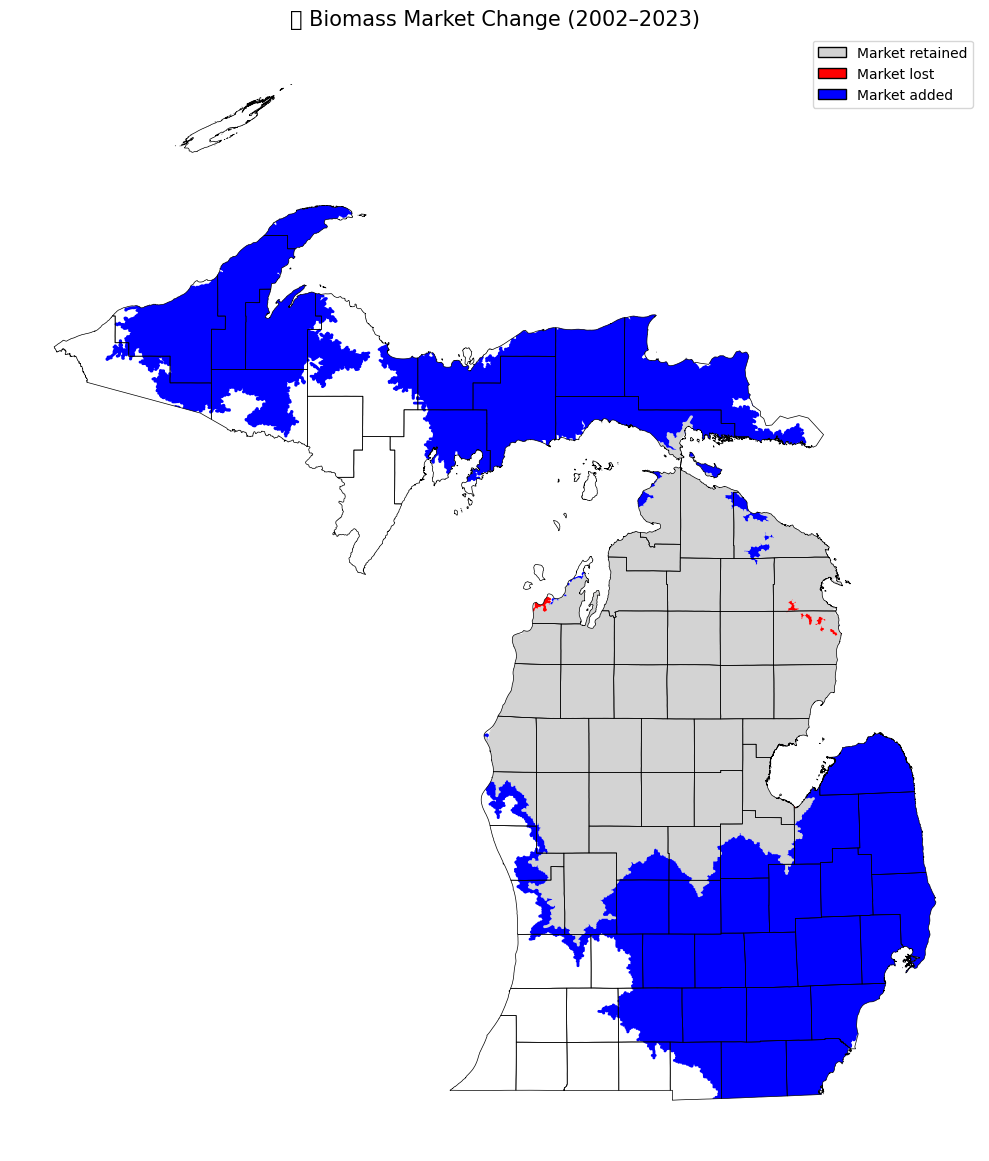

In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os

# === File paths ===
base_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps"

michigan_path = os.path.join(base_dir, "michigan_counties.shp")
path_2002 = os.path.join(base_dir, "biomass_2002.shp")
path_2023 = os.path.join(base_dir, "biomass_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g02 = gpd.read_file(path_2002)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g02 = g02.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom02 = gpd.overlay(g02.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom02.intersection(geom23)
lost_geom = geom02.difference(geom23)
added_geom = geom23.difference(geom02)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)

retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

# === Legend styling
legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)

# === Title and appearance
ax.set_title("📉 Biomass Market Change (2002–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()


C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\3735132068.py:28: UserWarning: `keep_geom_type=True` in overlay resulted in 90 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\3735132068.py:69: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


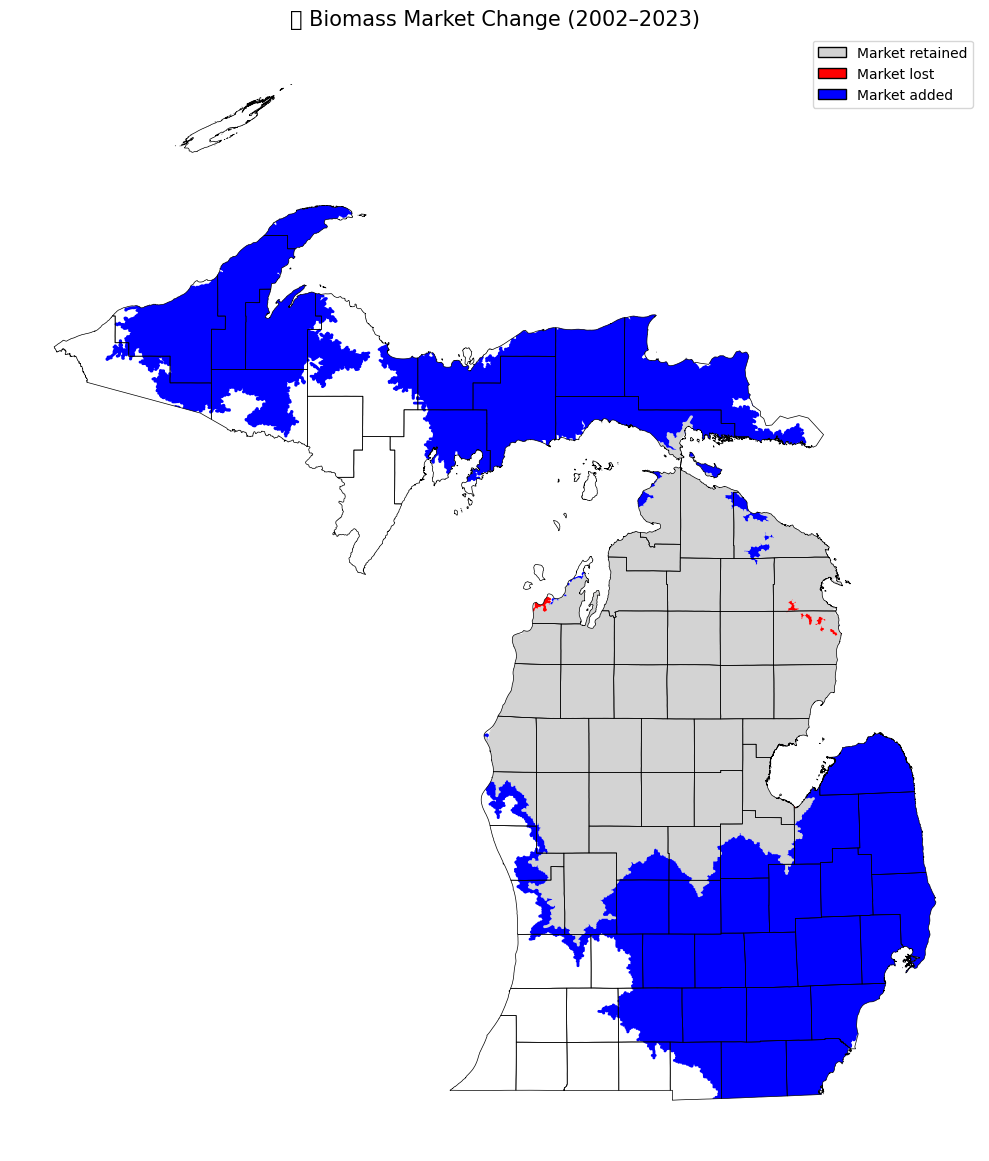

✅ Shapefiles saved for biomass 2002–2023:
- Retained: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\biomass_market_retained_2002_2023.shp
- Lost: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\biomass_market_lost_2002_2023.shp
- Added: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\biomass_market_added_2002_2023.shp


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os

# === File paths ===
base_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps"

michigan_path = os.path.join(base_dir, "michigan_counties.shp")
path_2002 = os.path.join(base_dir, "biomass_2002.shp")
path_2023 = os.path.join(base_dir, "biomass_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g02 = gpd.read_file(path_2002)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g02 = g02.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom02 = gpd.overlay(g02.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom02.intersection(geom23)
lost_geom = geom02.difference(geom23)
added_geom = geom23.difference(geom02)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)

retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

# === Legend styling
legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)

# === Title and appearance
ax.set_title("📉 Biomass Market Change (2002–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()


# from shapely.geometry import Polygon, MultiPolygon

# def clean_and_save(gdf, filepath):
#     # Explode multipart or geometry collections
#     gdf_exploded = gdf.explode(index_parts=False)
    
#     # Keep only Polygon or MultiPolygon geometries
#     gdf_clean = gdf_exploded[gdf_exploded.geometry.type.isin(["Polygon", "MultiPolygon"])]
    
#     # Save to file if not empty
#     if not gdf_clean.empty:
#         gdf_clean.to_file(filepath)
#     else:
#         print(f"⚠️ Skipped saving {filepath} (empty after filtering)")

# # === Save individual market change shapefiles ===
# output_change_dir = os.path.join(base_dir, "Market_Change_SHP")
# os.makedirs(output_change_dir, exist_ok=True)

# product = "biomass"
# year1 = "2002"
# year2 = "2023"

# retained_fp = os.path.join(output_change_dir, f"{product}_market_retained_{year1}_{year2}.shp")
# lost_fp     = os.path.join(output_change_dir, f"{product}_market_lost_{year1}_{year2}.shp")
# added_fp    = os.path.join(output_change_dir, f"{product}_market_added_{year1}_{year2}.shp")

# clean_and_save(retained, retained_fp)
# clean_and_save(lost, lost_fp)
# clean_and_save(added, added_fp)

# print(f"✅ Shapefiles saved for {product} {year1}–{year2}:\n- Retained: {retained_fp}\n- Lost: {lost_fp}\n- Added: {added_fp}")


C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\3674000652.py:28: UserWarning: `keep_geom_type=True` in overlay resulted in 90 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\3674000652.py:69: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


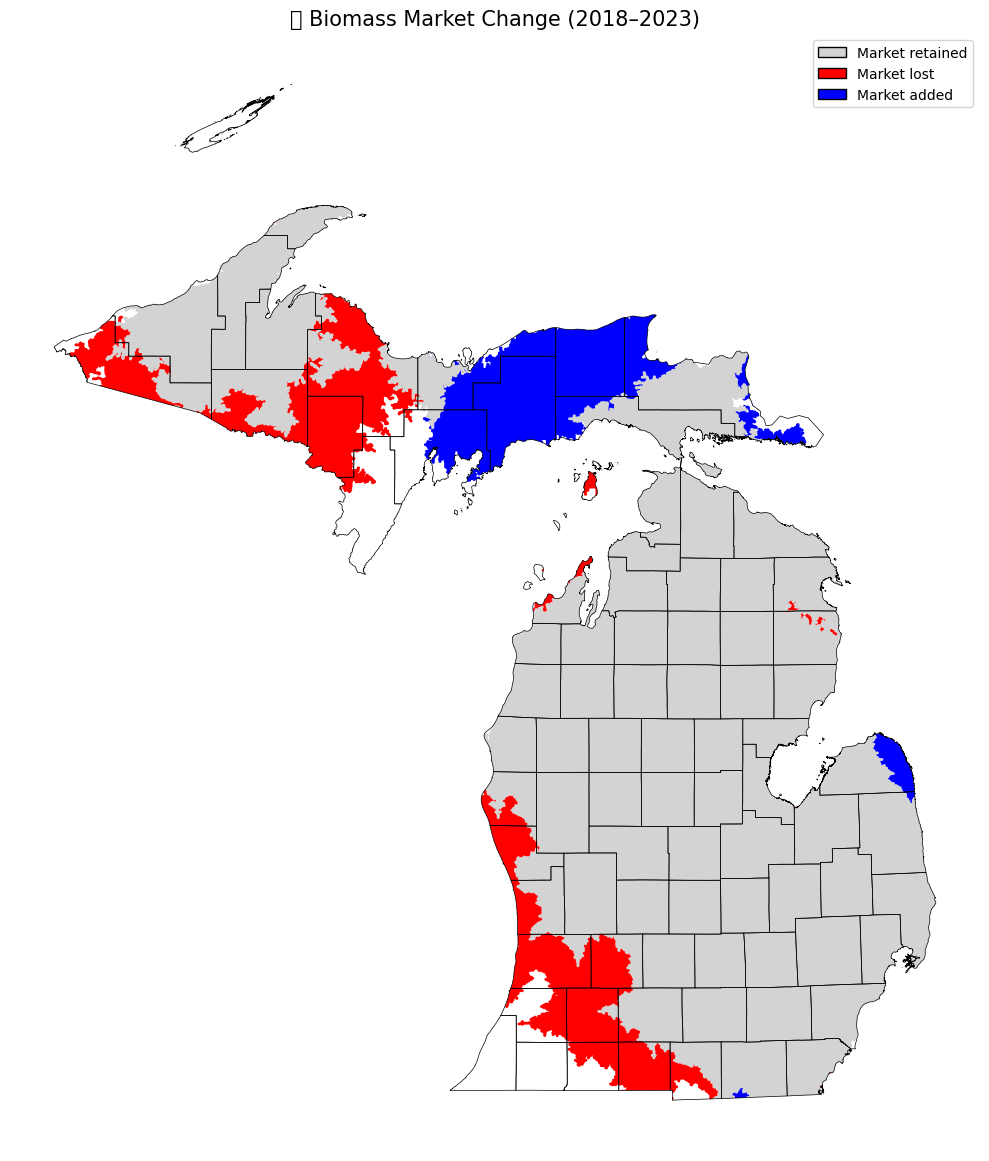

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os

# === File paths ===
base_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps"

michigan_path = os.path.join(base_dir, "michigan_counties.shp")
path_2018 = os.path.join(base_dir, "biomass_2018.shp")
path_2023 = os.path.join(base_dir, "biomass_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g18 = gpd.read_file(path_2018)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g18 = g18.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom18 = gpd.overlay(g18.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom18.intersection(geom23)
lost_geom = geom18.difference(geom23)
added_geom = geom23.difference(geom18)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)

retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

# === Legend styling
legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)

# === Title and appearance
ax.set_title("📉 Biomass Market Change (2018–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()


C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\201120711.py:28: UserWarning: `keep_geom_type=True` in overlay resulted in 90 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\201120711.py:69: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


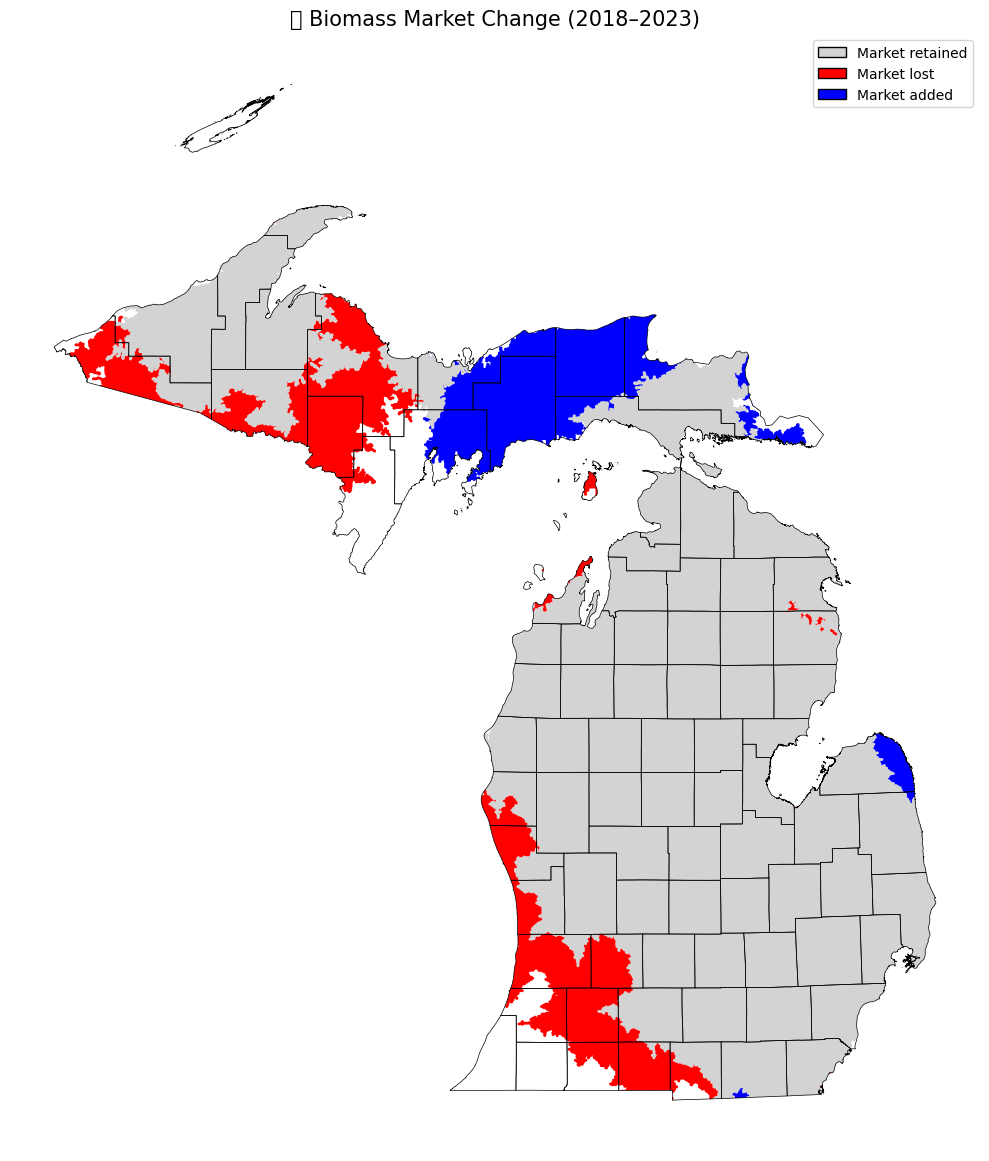

✅ Shapefiles saved for biomass 2018–2023:
- Retained: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\biomass_market_retained_2018_2023.shp
- Lost: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\biomass_market_lost_2018_2023.shp
- Added: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\biomass_market_added_2018_2023.shp


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os

# === File paths ===
base_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps"

michigan_path = os.path.join(base_dir, "michigan_counties.shp")
path_2018 = os.path.join(base_dir, "biomass_2018.shp")
path_2023 = os.path.join(base_dir, "biomass_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g18 = gpd.read_file(path_2018)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g18 = g18.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom18 = gpd.overlay(g18.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom18.intersection(geom23)
lost_geom = geom18.difference(geom23)
added_geom = geom23.difference(geom18)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)

retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

# === Legend styling
legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)

# === Title and appearance
ax.set_title("📉 Biomass Market Change (2018–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()


# from shapely.geometry import Polygon, MultiPolygon

# def clean_and_save(gdf, filepath):
#     # Explode multipart or geometry collections
#     gdf_exploded = gdf.explode(index_parts=False)

#     # Keep only Polygon or MultiPolygon geometries
#     gdf_clean = gdf_exploded[gdf_exploded.geometry.type.isin(["Polygon", "MultiPolygon"])]

#     # Save to file if not empty
#     if not gdf_clean.empty:
#         gdf_clean.to_file(filepath)
#     else:
#         print(f"⚠️ Skipped saving {filepath} (empty after filtering)")

# # === Save individual market change shapefiles ===
# output_change_dir = os.path.join(base_dir, "Market_Change_SHP")
# os.makedirs(output_change_dir, exist_ok=True)

# product = "biomass"
# year1 = "2018"
# year2 = "2023"

# retained_fp = os.path.join(output_change_dir, f"{product}_market_retained_{year1}_{year2}.shp")
# lost_fp     = os.path.join(output_change_dir, f"{product}_market_lost_{year1}_{year2}.shp")
# added_fp    = os.path.join(output_change_dir, f"{product}_market_added_{year1}_{year2}.shp")

# clean_and_save(retained, retained_fp)
# clean_and_save(lost, lost_fp)
# clean_and_save(added, added_fp)

# print(f"✅ Shapefiles saved for {product} {year1}–{year2}:\n- Retained: {retained_fp}\n- Lost: {lost_fp}\n- Added: {added_fp}")


# Hardwood Sawlogs 

C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\1714520718.py:29: UserWarning: `keep_geom_type=True` in overlay resulted in 145 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\1714520718.py:66: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


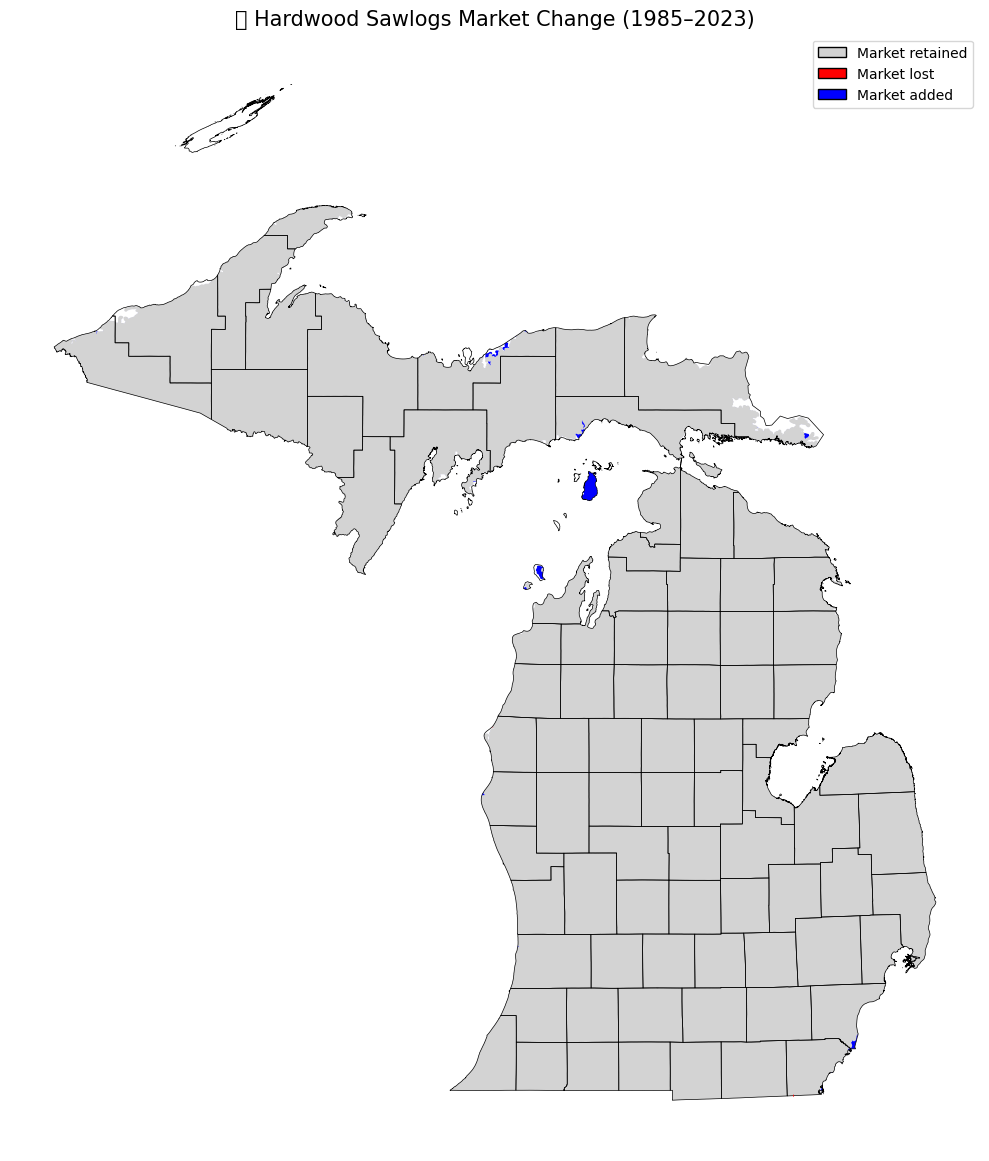

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
base_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps"

michigan_path = os.path.join(base_dir, "michigan_counties.shp")
path_1985 = os.path.join(base_dir, "hardwood_1985.shp")
path_2023 = os.path.join(base_dir, "hardwood_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g85 = gpd.read_file(path_1985)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g85 = g85.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom85 = gpd.overlay(g85.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom85.intersection(geom23)
lost_geom = geom85.difference(geom23)
added_geom = geom23.difference(geom85)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Hardwood Sawlogs Market Change (1985–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()

# # === Function to clean and save shapefiles
# def clean_and_save(gdf, filepath):
#     gdf_exploded = gdf.explode(index_parts=False)
#     gdf_clean = gdf_exploded[gdf_exploded.geometry.type.isin(["Polygon", "MultiPolygon"])]
#     if not gdf_clean.empty:
#         gdf_clean.to_file(filepath)
#     else:
#         print(f"⚠️ Skipped saving {filepath} (empty after filtering)")

# # === Save output shapefiles ===
# output_change_dir = os.path.join(base_dir, "Market_Change_SHP")
# os.makedirs(output_change_dir, exist_ok=True)

# product = "hardwood"
# year1 = "1985"
# year2 = "2023"

# retained_fp = os.path.join(output_change_dir, f"{product}_market_retained_{year1}_{year2}.shp")
# lost_fp     = os.path.join(output_change_dir, f"{product}_market_lost_{year1}_{year2}.shp")
# added_fp    = os.path.join(output_change_dir, f"{product}_market_added_{year1}_{year2}.shp")

# clean_and_save(retained, retained_fp)
# clean_and_save(lost, lost_fp)
# clean_and_save(added, added_fp)

# print(f"✅ Saved shapefiles for {product} {year1}–{year2}:\n- Retained: {retained_fp}\n- Lost: {lost_fp}\n- Added: {added_fp}")


C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\628991205.py:29: UserWarning: `keep_geom_type=True` in overlay resulted in 145 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\628991205.py:66: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


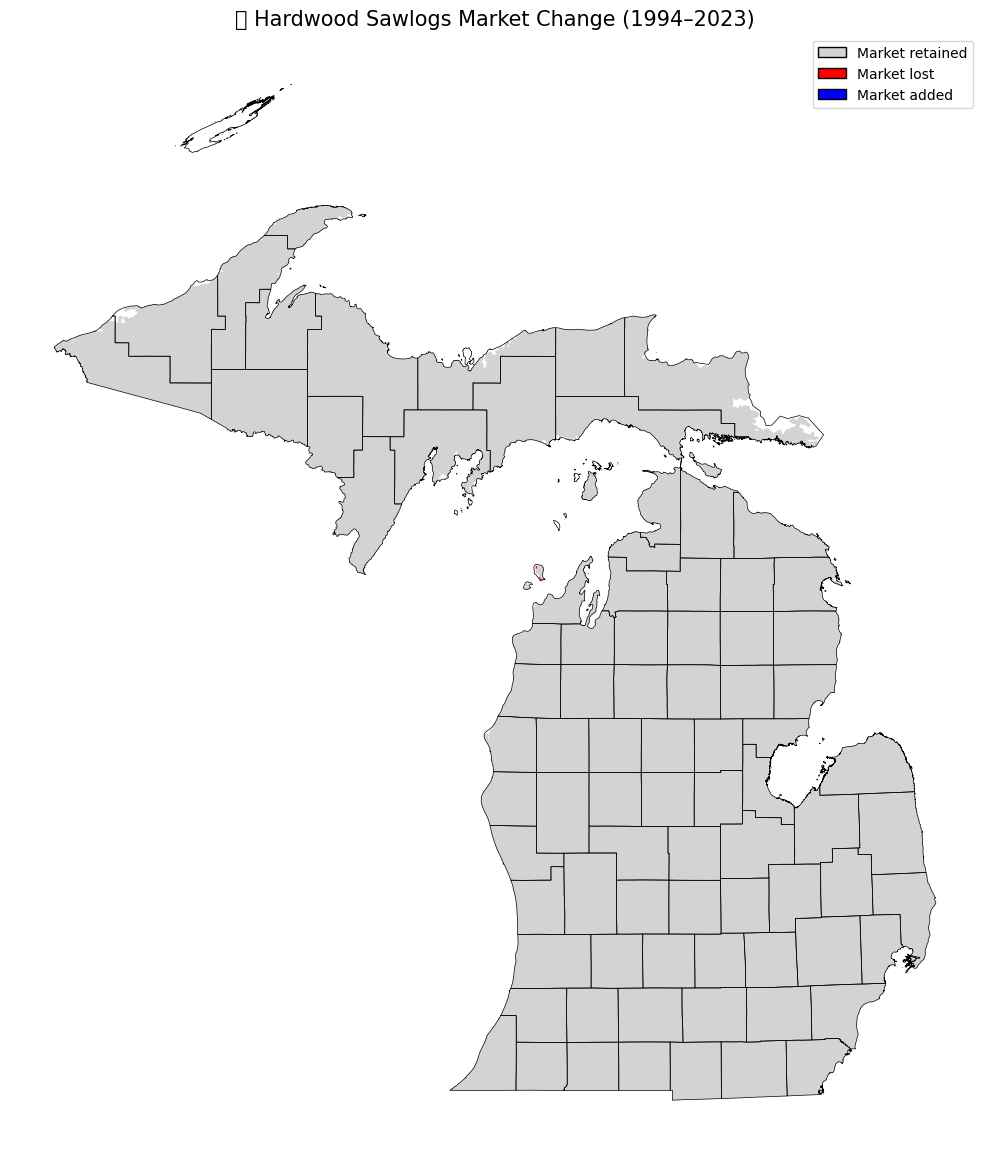

✅ Saved shapefiles for hardwood 1994–2023:
- Retained: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\hardwood_market_retained_1994_2023.shp
- Lost: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\hardwood_market_lost_1994_2023.shp
- Added: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\hardwood_market_added_1994_2023.shp


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
base_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps"

michigan_path = os.path.join(base_dir, "michigan_counties.shp")
path_1994 = os.path.join(base_dir, "hardwood_1994.shp")
path_2023 = os.path.join(base_dir, "hardwood_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g94 = gpd.read_file(path_1994)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g94 = g94.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom94 = gpd.overlay(g94.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom94.intersection(geom23)
lost_geom = geom94.difference(geom23)
added_geom = geom23.difference(geom94)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Hardwood Sawlogs Market Change (1994–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()

# # === Function to clean and save shapefiles
# def clean_and_save(gdf, filepath):
#     gdf_exploded = gdf.explode(index_parts=False)
#     gdf_clean = gdf_exploded[gdf_exploded.geometry.type.isin(["Polygon", "MultiPolygon"])]
#     if not gdf_clean.empty:
#         gdf_clean.to_file(filepath)
#     else:
#         print(f"⚠️ Skipped saving {filepath} (empty after filtering)")

# # === Save output shapefiles ===
# output_change_dir = os.path.join(base_dir, "Market_Change_SHP")
# os.makedirs(output_change_dir, exist_ok=True)

# product = "hardwood"
# year1 = "1994"
# year2 = "2023"

# retained_fp = os.path.join(output_change_dir, f"{product}_market_retained_{year1}_{year2}.shp")
# lost_fp     = os.path.join(output_change_dir, f"{product}_market_lost_{year1}_{year2}.shp")
# added_fp    = os.path.join(output_change_dir, f"{product}_market_added_{year1}_{year2}.shp")

# clean_and_save(retained, retained_fp)
# clean_and_save(lost, lost_fp)
# clean_and_save(added, added_fp)

# print(f"✅ Saved shapefiles for {product} {year1}–{year2}:\n- Retained: {retained_fp}\n- Lost: {lost_fp}\n- Added: {added_fp}")


C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\1458793278.py:29: UserWarning: `keep_geom_type=True` in overlay resulted in 145 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\1458793278.py:66: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


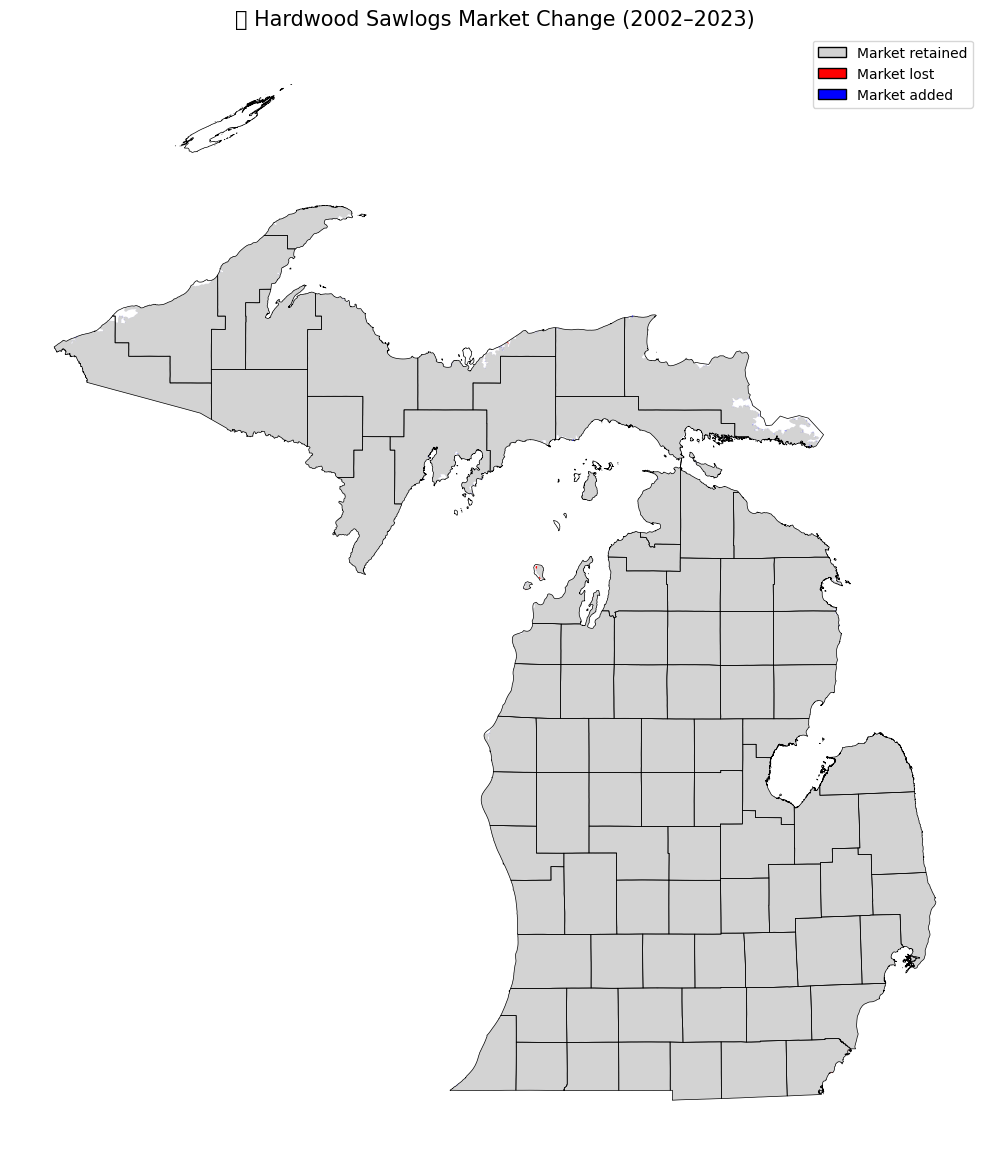

✅ Saved shapefiles for hardwood 2002–2023:
- Retained: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\hardwood_market_retained_2002_2023.shp
- Lost: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\hardwood_market_lost_2002_2023.shp
- Added: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\hardwood_market_added_2002_2023.shp


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
base_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps"

michigan_path = os.path.join(base_dir, "michigan_counties.shp")
path_2002 = os.path.join(base_dir, "hardwood_2002.shp")
path_2023 = os.path.join(base_dir, "hardwood_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g02 = gpd.read_file(path_2002)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g02 = g02.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom02 = gpd.overlay(g02.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom02.intersection(geom23)
lost_geom = geom02.difference(geom23)
added_geom = geom23.difference(geom02)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Hardwood Sawlogs Market Change (2002–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()

# # === Function to clean and save shapefiles
# def clean_and_save(gdf, filepath):
#     gdf_exploded = gdf.explode(index_parts=False)
#     gdf_clean = gdf_exploded[gdf_exploded.geometry.type.isin(["Polygon", "MultiPolygon"])]
#     if not gdf_clean.empty:
#         gdf_clean.to_file(filepath)
#     else:
#         print(f"⚠️ Skipped saving {filepath} (empty after filtering)")

# # === Save output shapefiles ===
# output_change_dir = os.path.join(base_dir, "Market_Change_SHP")
# os.makedirs(output_change_dir, exist_ok=True)

# product = "hardwood"
# year1 = "2002"
# year2 = "2023"

# retained_fp = os.path.join(output_change_dir, f"{product}_market_retained_{year1}_{year2}.shp")
# lost_fp     = os.path.join(output_change_dir, f"{product}_market_lost_{year1}_{year2}.shp")
# added_fp    = os.path.join(output_change_dir, f"{product}_market_added_{year1}_{year2}.shp")

# clean_and_save(retained, retained_fp)
# clean_and_save(lost, lost_fp)
# clean_and_save(added, added_fp)

# print(f"✅ Saved shapefiles for {product} {year1}–{year2}:\n- Retained: {retained_fp}\n- Lost: {lost_fp}\n- Added: {added_fp}")


C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\789491354.py:29: UserWarning: `keep_geom_type=True` in overlay resulted in 145 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\789491354.py:66: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


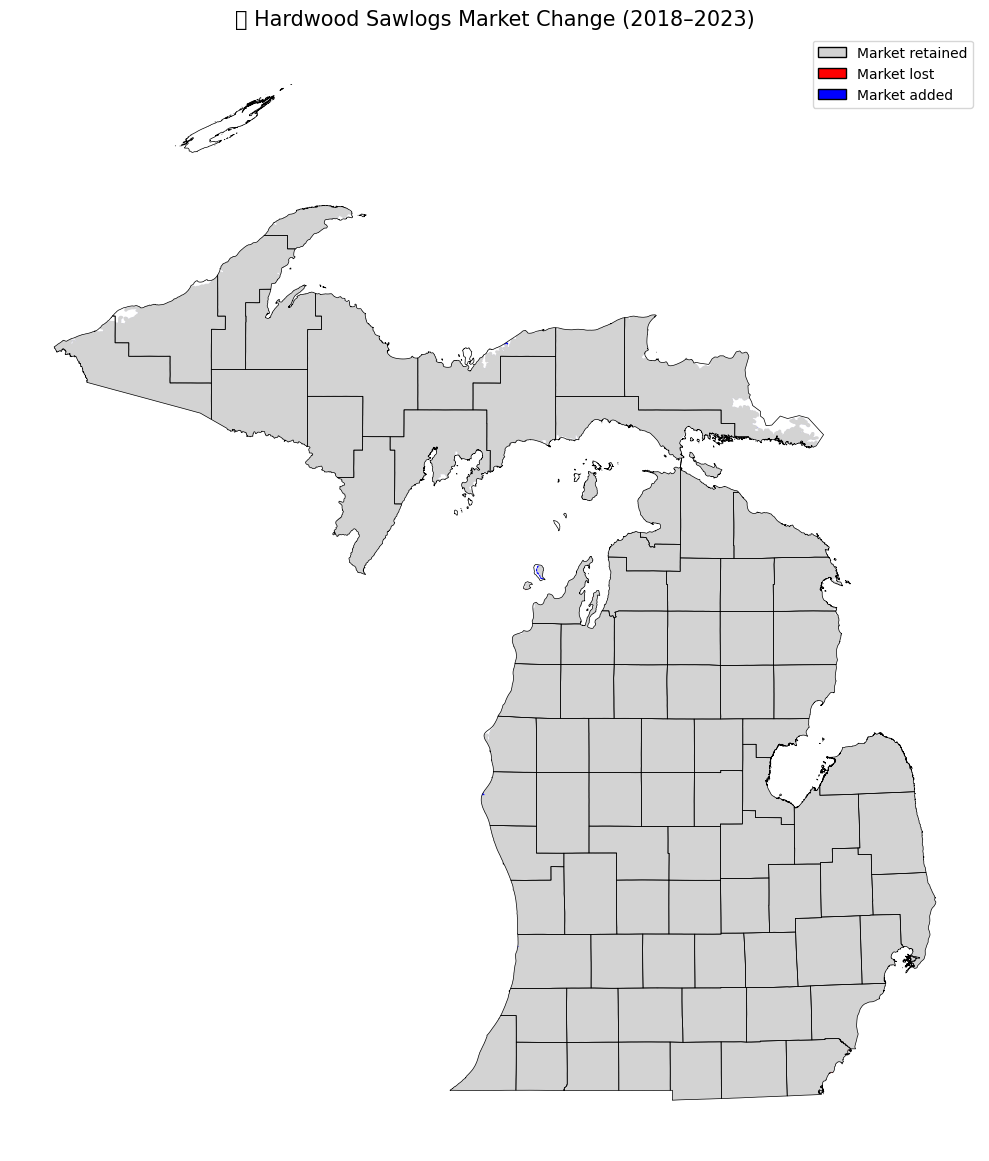

✅ Saved shapefiles for hardwood 2018–2023:
- Retained: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\hardwood_market_retained_2018_2023.shp
- Lost: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\hardwood_market_lost_2018_2023.shp
- Added: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\hardwood_market_added_2018_2023.shp


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
base_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps"

michigan_path = os.path.join(base_dir, "michigan_counties.shp")
path_2018 = os.path.join(base_dir, "hardwood_2018.shp")
path_2023 = os.path.join(base_dir, "hardwood_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g18 = gpd.read_file(path_2018)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g18 = g18.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom18 = gpd.overlay(g18.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom18.intersection(geom23)
lost_geom = geom18.difference(geom23)
added_geom = geom23.difference(geom18)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Hardwood Sawlogs Market Change (2018–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()

# # === Function to clean and save shapefiles
# def clean_and_save(gdf, filepath):
#     gdf_exploded = gdf.explode(index_parts=False)
#     gdf_clean = gdf_exploded[gdf_exploded.geometry.type.isin(["Polygon", "MultiPolygon"])]
#     if not gdf_clean.empty:
#         gdf_clean.to_file(filepath)
#     else:
#         print(f"⚠️ Skipped saving {filepath} (empty after filtering)")

# # === Save output shapefiles ===
# output_change_dir = os.path.join(base_dir, "Market_Change_SHP")
# os.makedirs(output_change_dir, exist_ok=True)

# product = "hardwood"
# year1 = "2018"
# year2 = "2023"

# retained_fp = os.path.join(output_change_dir, f"{product}_market_retained_{year1}_{year2}.shp")
# lost_fp     = os.path.join(output_change_dir, f"{product}_market_lost_{year1}_{year2}.shp")
# added_fp    = os.path.join(output_change_dir, f"{product}_market_added_{year1}_{year2}.shp")

# clean_and_save(retained, retained_fp)
# clean_and_save(lost, lost_fp)
# clean_and_save(added, added_fp)

# print(f"✅ Saved shapefiles for {product} {year1}–{year2}:\n- Retained: {retained_fp}\n- Lost: {lost_fp}\n- Added: {added_fp}")


# Pulpwood 

C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\3736870360.py:29: UserWarning: `keep_geom_type=True` in overlay resulted in 91 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\3736870360.py:66: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


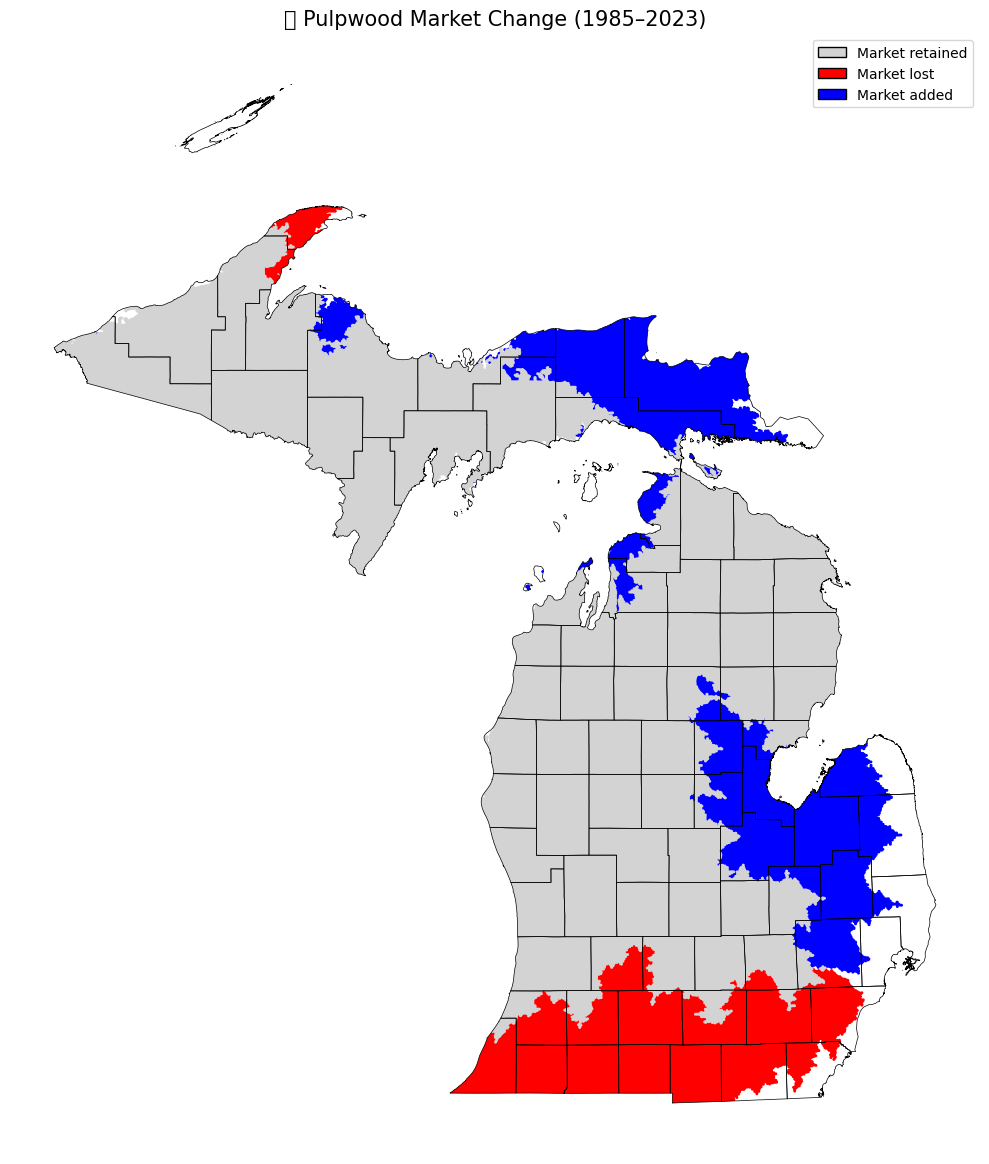

✅ Saved shapefiles for pulpwood 1985–2023:
- Retained: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\pulpwood_market_retained_1985_2023.shp
- Lost: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\pulpwood_market_lost_1985_2023.shp
- Added: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\pulpwood_market_added_1985_2023.shp


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
base_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps"

michigan_path = os.path.join(base_dir, "michigan_counties.shp")
path_1985 = os.path.join(base_dir, "pulpwood_1985.shp")
path_2023 = os.path.join(base_dir, "pulpwood_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g85 = gpd.read_file(path_1985)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g85 = g85.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom85 = gpd.overlay(g85.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Market change analysis
retained_geom = geom85.intersection(geom23)
lost_geom = geom85.difference(geom23)
added_geom = geom23.difference(geom85)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Pulpwood Market Change (1985–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()

# # === Function to clean and save shapefiles
# def clean_and_save(gdf, filepath):
#     gdf_exploded = gdf.explode(index_parts=False)
#     gdf_clean = gdf_exploded[gdf_exploded.geometry.type.isin(["Polygon", "MultiPolygon"])]
#     if not gdf_clean.empty:
#         gdf_clean.to_file(filepath)
#     else:
#         print(f"⚠️ Skipped saving {filepath} (empty after filtering)")

# # === Save individual shapefiles
# output_change_dir = os.path.join(base_dir, "Market_Change_SHP")
# os.makedirs(output_change_dir, exist_ok=True)

# product = "pulpwood"
# year1 = "1985"
# year2 = "2023"

# retained_fp = os.path.join(output_change_dir, f"{product}_market_retained_{year1}_{year2}.shp")
# lost_fp     = os.path.join(output_change_dir, f"{product}_market_lost_{year1}_{year2}.shp")
# added_fp    = os.path.join(output_change_dir, f"{product}_market_added_{year1}_{year2}.shp")

# clean_and_save(retained, retained_fp)
# clean_and_save(lost, lost_fp)
# clean_and_save(added, added_fp)

# print(f"✅ Saved shapefiles for {product} {year1}–{year2}:\n- Retained: {retained_fp}\n- Lost: {lost_fp}\n- Added: {added_fp}")


C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\2061765223.py:29: UserWarning: `keep_geom_type=True` in overlay resulted in 91 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\2061765223.py:66: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


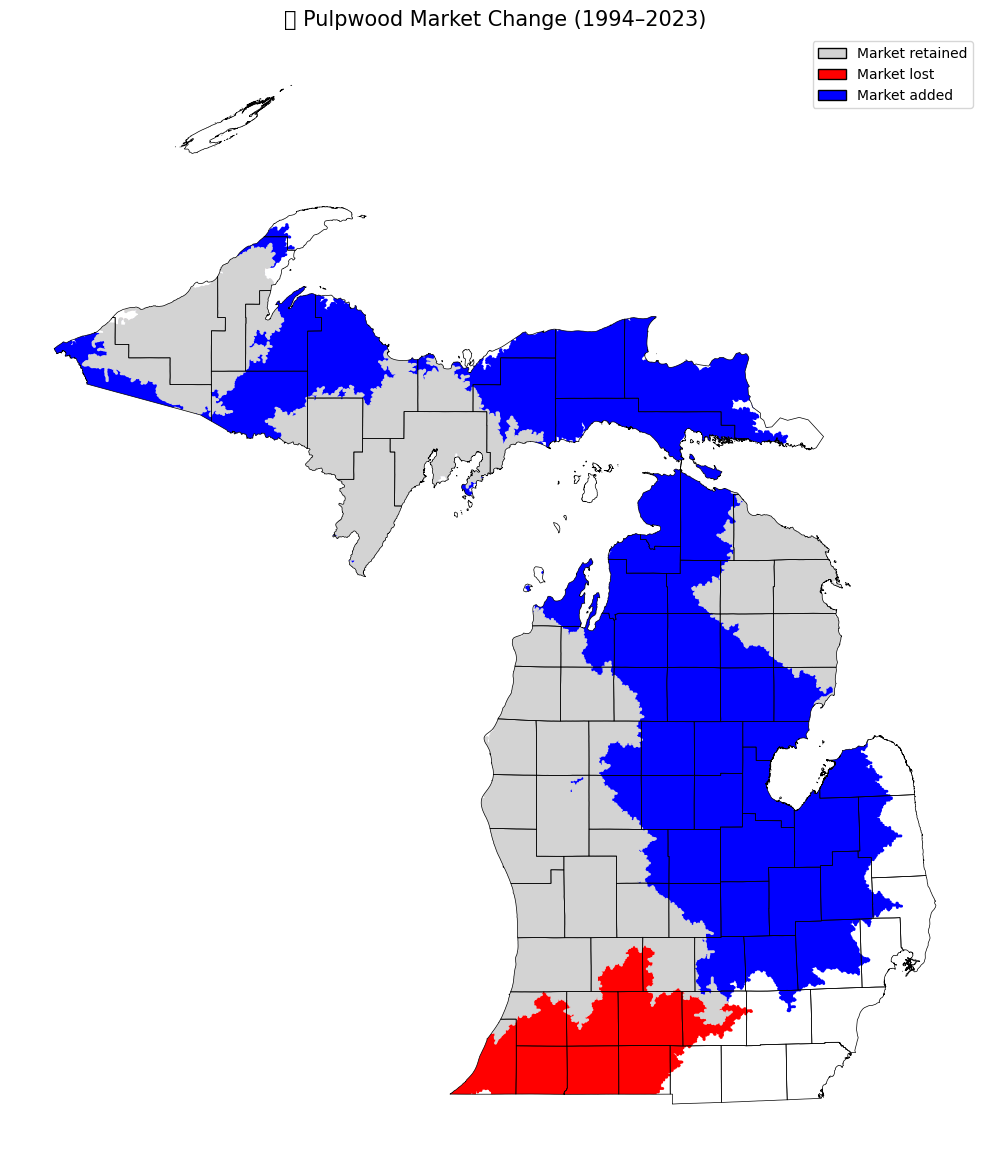

✅ Saved shapefiles for pulpwood 1994–2023:
- Retained: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\pulpwood_market_retained_1994_2023.shp
- Lost: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\pulpwood_market_lost_1994_2023.shp
- Added: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\pulpwood_market_added_1994_2023.shp


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
base_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps"

michigan_path = os.path.join(base_dir, "michigan_counties.shp")
path_1994 = os.path.join(base_dir, "pulpwood_1994.shp")
path_2023 = os.path.join(base_dir, "pulpwood_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g94 = gpd.read_file(path_1994)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g94 = g94.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market areas to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom94 = gpd.overlay(g94.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change categories
retained_geom = geom94.intersection(geom23)
lost_geom = geom94.difference(geom23)
added_geom = geom23.difference(geom94)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Pulpwood Market Change (1994–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()

# # === Function to clean and save shapefiles
# def clean_and_save(gdf, filepath):
#     gdf_exploded = gdf.explode(index_parts=False)
#     gdf_clean = gdf_exploded[gdf_exploded.geometry.type.isin(["Polygon", "MultiPolygon"])]
#     if not gdf_clean.empty:
#         gdf_clean.to_file(filepath)
#     else:
#         print(f"⚠️ Skipped saving {filepath} (empty after filtering)")

# # === Save output shapefiles
# output_change_dir = os.path.join(base_dir, "Market_Change_SHP")
# os.makedirs(output_change_dir, exist_ok=True)

# product = "pulpwood"
# year1 = "1994"
# year2 = "2023"

# retained_fp = os.path.join(output_change_dir, f"{product}_market_retained_{year1}_{year2}.shp")
# lost_fp     = os.path.join(output_change_dir, f"{product}_market_lost_{year1}_{year2}.shp")
# added_fp    = os.path.join(output_change_dir, f"{product}_market_added_{year1}_{year2}.shp")

# clean_and_save(retained, retained_fp)
# clean_and_save(lost, lost_fp)
# clean_and_save(added, added_fp)

# print(f"✅ Saved shapefiles for {product} {year1}–{year2}:\n- Retained: {retained_fp}\n- Lost: {lost_fp}\n- Added: {added_fp}")


C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\883977781.py:29: UserWarning: `keep_geom_type=True` in overlay resulted in 91 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\883977781.py:66: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


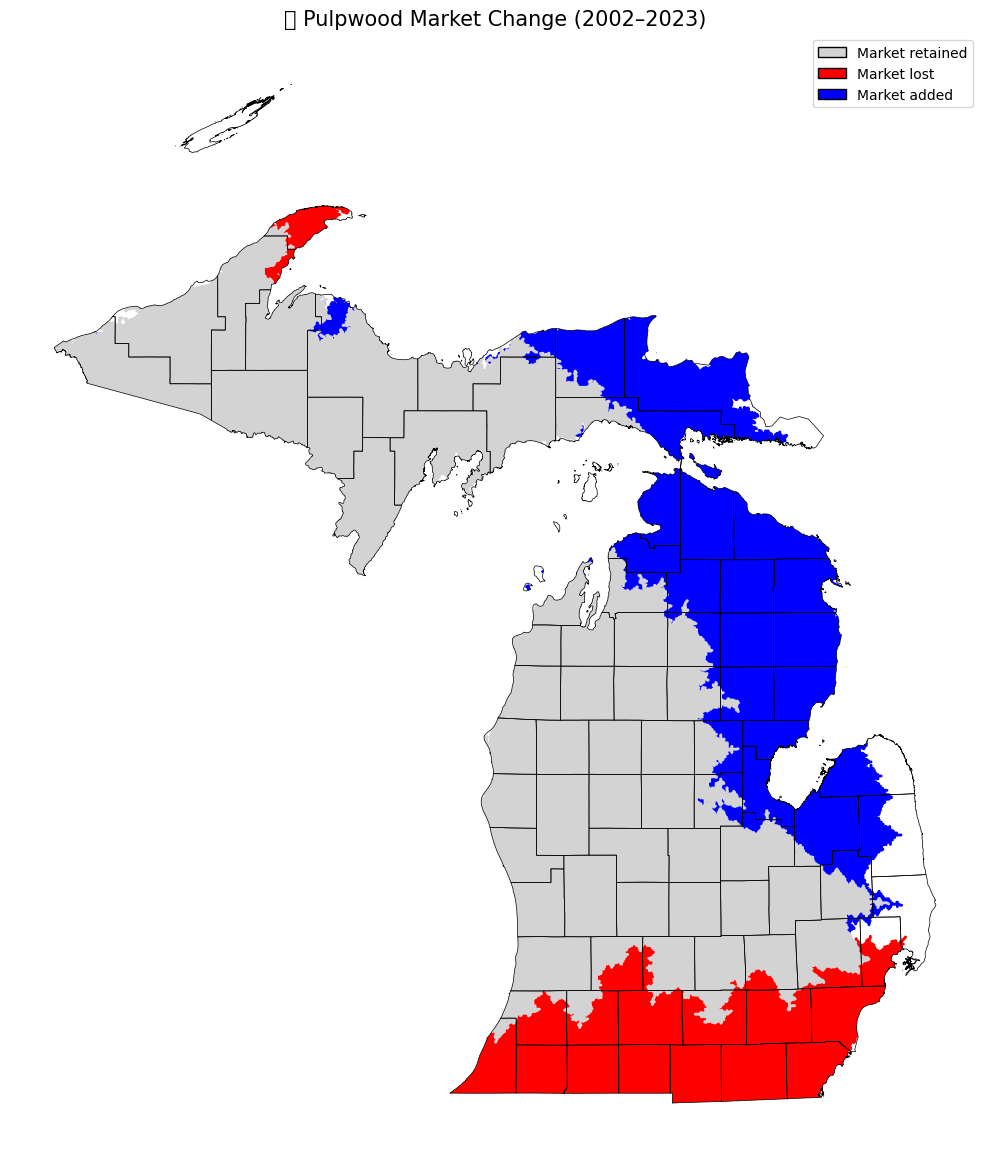

✅ Saved shapefiles for pulpwood 2002–2023:
- Retained: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\pulpwood_market_retained_2002_2023.shp
- Lost: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\pulpwood_market_lost_2002_2023.shp
- Added: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\pulpwood_market_added_2002_2023.shp


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
base_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps"

michigan_path = os.path.join(base_dir, "michigan_counties.shp")
path_2002 = os.path.join(base_dir, "pulpwood_2002.shp")
path_2023 = os.path.join(base_dir, "pulpwood_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g02 = gpd.read_file(path_2002)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g02 = g02.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom02 = gpd.overlay(g02.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Market change geometries
retained_geom = geom02.intersection(geom23)
lost_geom = geom02.difference(geom23)
added_geom = geom23.difference(geom02)

# === Wrap into GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip to MI
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Pulpwood Market Change (2002–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()

# # === Save shapefiles helper
# def clean_and_save(gdf, filepath):
#     gdf_exploded = gdf.explode(index_parts=False)
#     gdf_clean = gdf_exploded[gdf_exploded.geometry.type.isin(["Polygon", "MultiPolygon"])]
#     if not gdf_clean.empty:
#         gdf_clean.to_file(filepath)
#     else:
#         print(f"⚠️ Skipped saving {filepath} (empty or invalid geometries)")

# # === Save output shapefiles
# output_dir = os.path.join(base_dir, "Market_Change_SHP")
# os.makedirs(output_dir, exist_ok=True)

# product = "pulpwood"
# year1 = "2002"
# year2 = "2023"

# retained_fp = os.path.join(output_dir, f"{product}_market_retained_{year1}_{year2}.shp")
# lost_fp     = os.path.join(output_dir, f"{product}_market_lost_{year1}_{year2}.shp")
# added_fp    = os.path.join(output_dir, f"{product}_market_added_{year1}_{year2}.shp")

# clean_and_save(retained, retained_fp)
# clean_and_save(lost, lost_fp)
# clean_and_save(added, added_fp)

# print(f"✅ Saved shapefiles for {product} {year1}–{year2}:\n- Retained: {retained_fp}\n- Lost: {lost_fp}\n- Added: {added_fp}")


C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\464420145.py:29: UserWarning: `keep_geom_type=True` in overlay resulted in 91 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\464420145.py:66: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


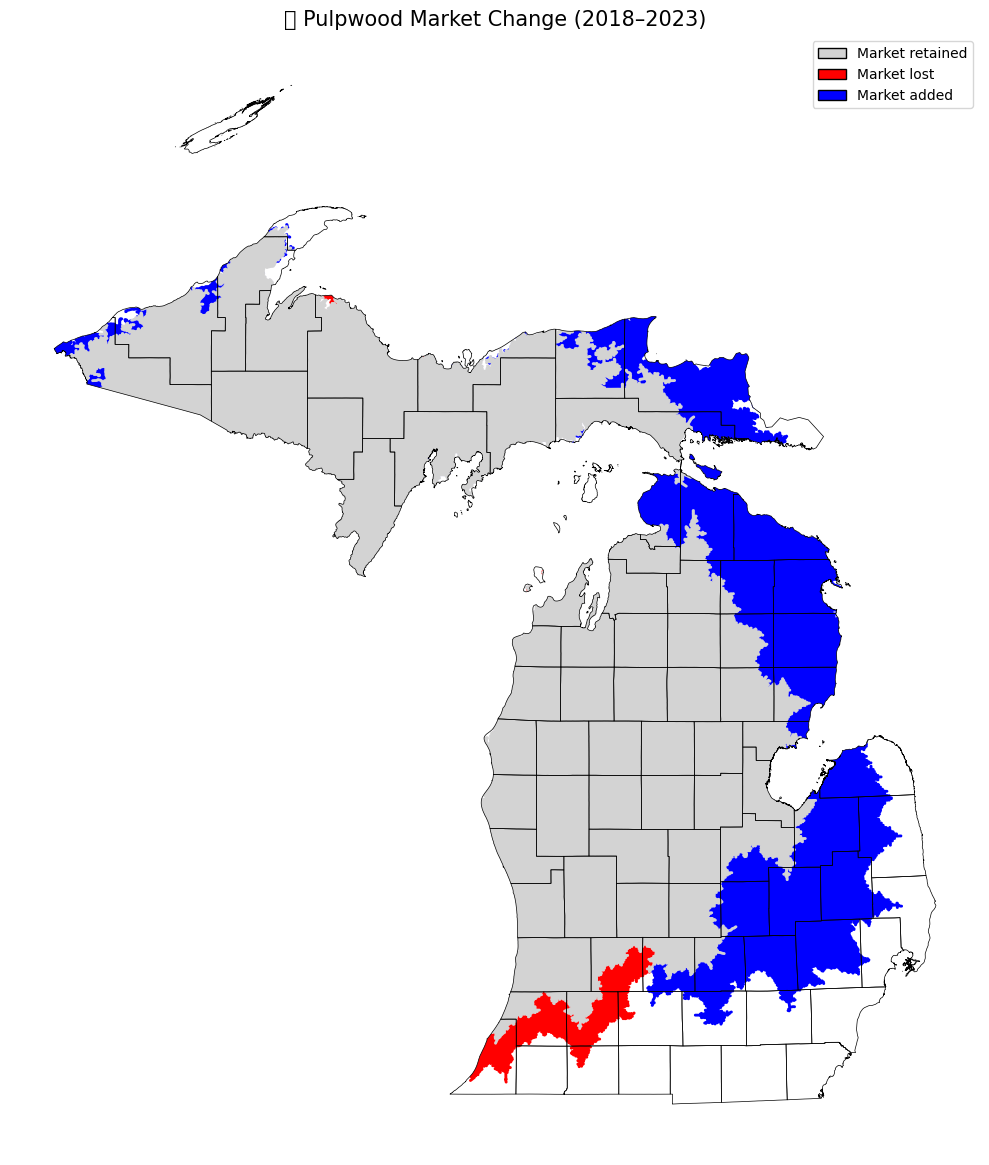

✅ Saved shapefiles for pulpwood 2018–2023:
- Retained: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\pulpwood_market_retained_2018_2023.shp
- Lost: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\pulpwood_market_lost_2018_2023.shp
- Added: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\pulpwood_market_added_2018_2023.shp


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
base_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps"

michigan_path = os.path.join(base_dir, "michigan_counties.shp")
path_2018 = os.path.join(base_dir, "pulpwood_2018.shp")
path_2023 = os.path.join(base_dir, "pulpwood_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g18 = gpd.read_file(path_2018)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g18 = g18.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market area to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom18 = gpd.overlay(g18.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Calculate market change geometries
retained_geom = geom18.intersection(geom23)
lost_geom = geom18.difference(geom23)
added_geom = geom23.difference(geom18)

# === Wrap into GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Clip to Michigan
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Pulpwood Market Change (2018–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()

# # === Save shapefiles helper
# def clean_and_save(gdf, filepath):
#     gdf_exploded = gdf.explode(index_parts=False)
#     gdf_clean = gdf_exploded[gdf_exploded.geometry.type.isin(["Polygon", "MultiPolygon"])]
#     if not gdf_clean.empty:
#         gdf_clean.to_file(filepath)
#     else:
#         print(f"⚠️ Skipped saving {filepath} (empty or invalid geometries)")

# # === Save output shapefiles
# output_dir = os.path.join(base_dir, "Market_Change_SHP")
# os.makedirs(output_dir, exist_ok=True)

# product = "pulpwood"
# year1 = "2018"
# year2 = "2023"

# retained_fp = os.path.join(output_dir, f"{product}_market_retained_{year1}_{year2}.shp")
# lost_fp     = os.path.join(output_dir, f"{product}_market_lost_{year1}_{year2}.shp")
# added_fp    = os.path.join(output_dir, f"{product}_market_added_{year1}_{year2}.shp")

# clean_and_save(retained, retained_fp)
# clean_and_save(lost, lost_fp)
# clean_and_save(added, added_fp)

# print(f"✅ Saved shapefiles for {product} {year1}–{year2}:\n- Retained: {retained_fp}\n- Lost: {lost_fp}\n- Added: {added_fp}")


# Softwood

C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\3069061812.py:29: UserWarning: `keep_geom_type=True` in overlay resulted in 145 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\3069061812.py:66: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


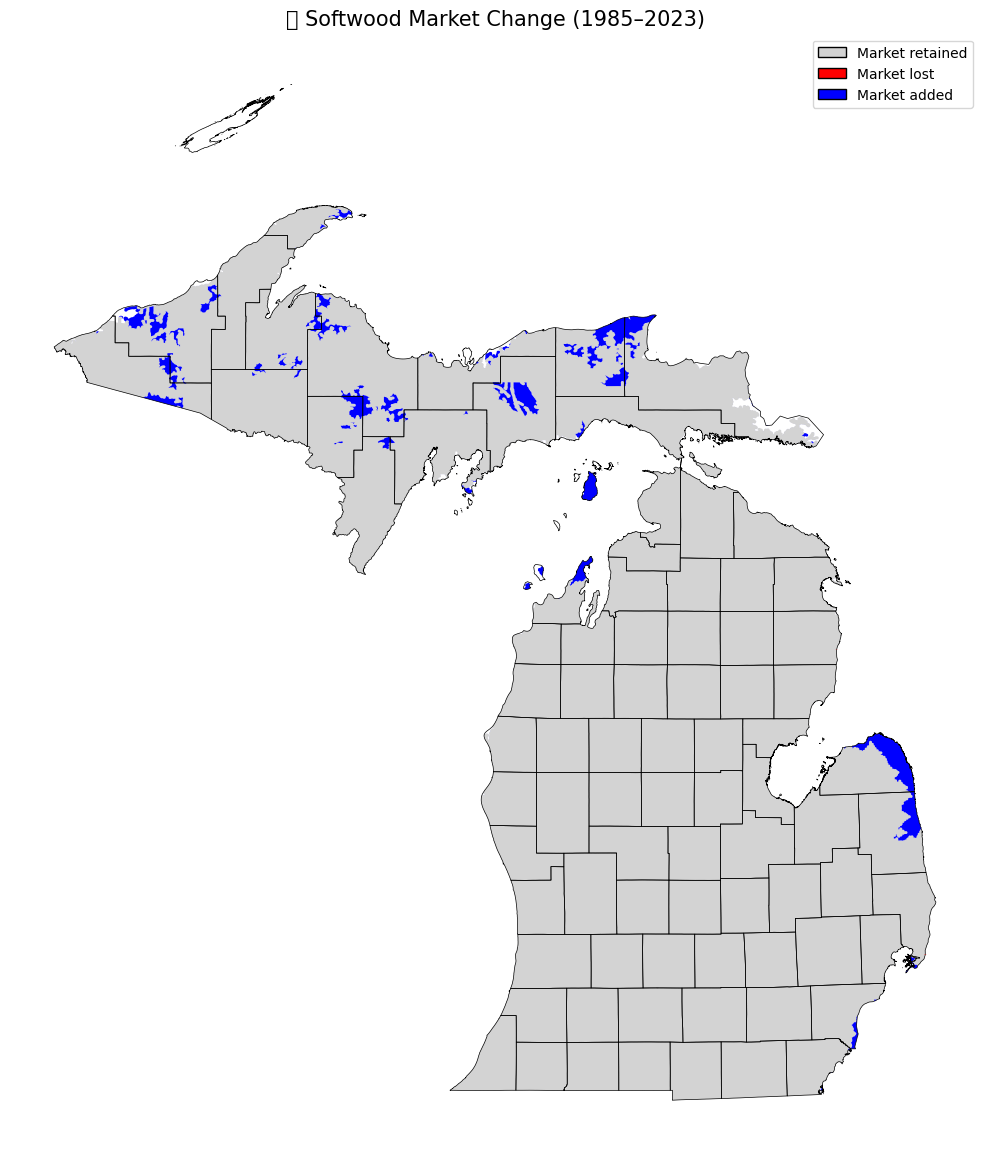

✅ Saved shapefiles for softwood 1985–2023:
- Retained: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\softwood_market_retained_1985_2023.shp
- Lost: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\softwood_market_lost_1985_2023.shp
- Added: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\softwood_market_added_1985_2023.shp


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
base_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps"

michigan_path = os.path.join(base_dir, "michigan_counties.shp")
path_1985 = os.path.join(base_dir, "softwood_1985.shp")
path_2023 = os.path.join(base_dir, "softwood_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g85 = gpd.read_file(path_1985)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g85 = g85.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market area to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom85 = gpd.overlay(g85.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Calculate market change geometries
retained_geom = geom85.intersection(geom23)
lost_geom = geom85.difference(geom23)
added_geom = geom23.difference(geom85)

# === Wrap into GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Clip to Michigan boundary
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Softwood Market Change (1985–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()

# # === Save shapefiles helper
# def clean_and_save(gdf, filepath):
#     gdf_exploded = gdf.explode(index_parts=False)
#     gdf_clean = gdf_exploded[gdf_exploded.geometry.type.isin(["Polygon", "MultiPolygon"])]
#     if not gdf_clean.empty:
#         gdf_clean.to_file(filepath)
#     else:
#         print(f"⚠️ Skipped saving {filepath} (empty or invalid geometries)")

# # === Save output shapefiles
# output_dir = os.path.join(base_dir, "Market_Change_SHP")
# os.makedirs(output_dir, exist_ok=True)

# product = "softwood"
# year1 = "1985"
# year2 = "2023"

# retained_fp = os.path.join(output_dir, f"{product}_market_retained_{year1}_{year2}.shp")
# lost_fp     = os.path.join(output_dir, f"{product}_market_lost_{year1}_{year2}.shp")
# added_fp    = os.path.join(output_dir, f"{product}_market_added_{year1}_{year2}.shp")

# clean_and_save(retained, retained_fp)
# clean_and_save(lost, lost_fp)
# clean_and_save(added, added_fp)

# print(f"✅ Saved shapefiles for {product} {year1}–{year2}:\n- Retained: {retained_fp}\n- Lost: {lost_fp}\n- Added: {added_fp}")


C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\3864735044.py:29: UserWarning: `keep_geom_type=True` in overlay resulted in 145 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\3864735044.py:66: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


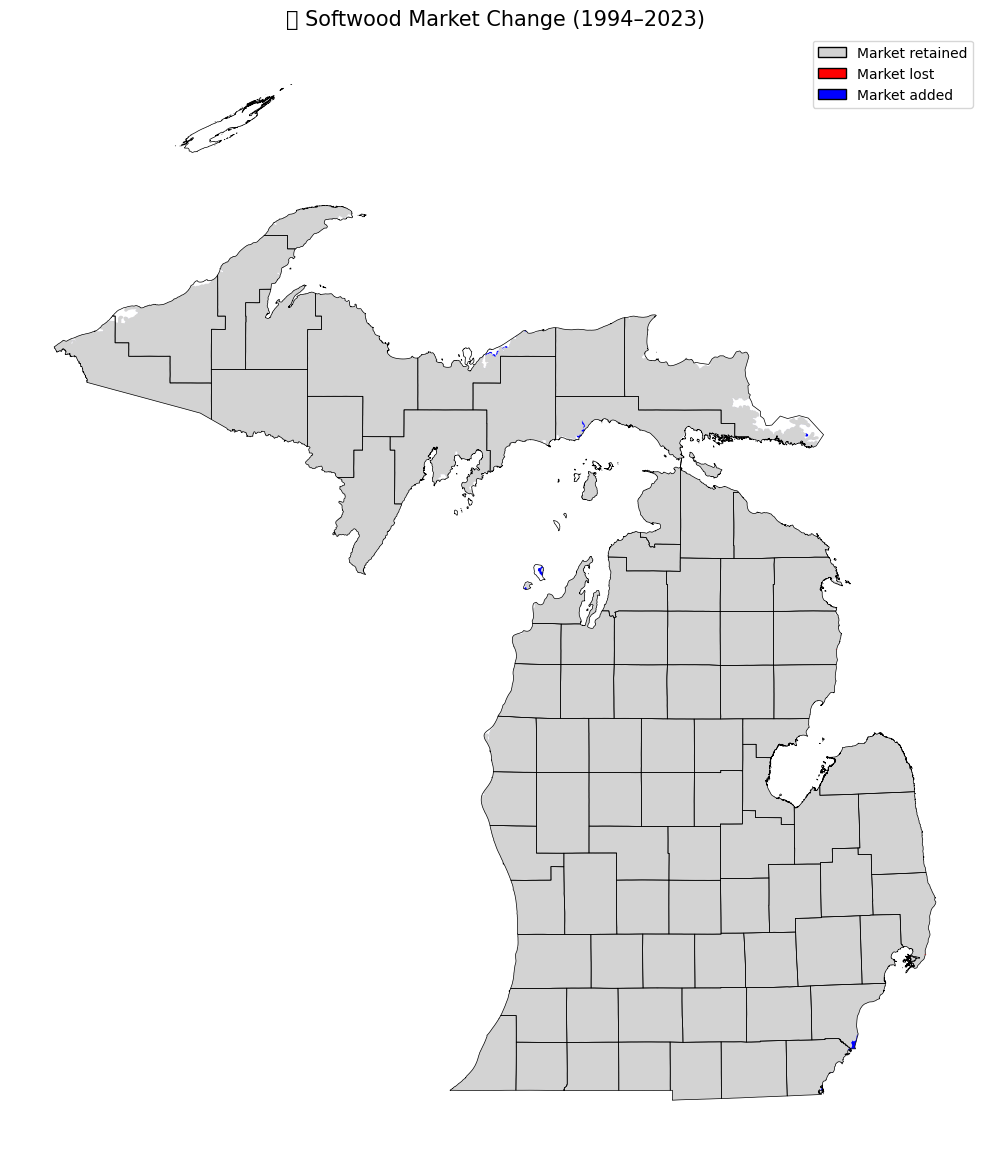

✅ Saved shapefiles for softwood 1994–2023:
- Retained: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\softwood_market_retained_1994_2023.shp
- Lost: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\softwood_market_lost_1994_2023.shp
- Added: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\softwood_market_added_1994_2023.shp


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
base_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps"

michigan_path = os.path.join(base_dir, "michigan_counties.shp")
path_1994 = os.path.join(base_dir, "softwood_1994.shp")
path_2023 = os.path.join(base_dir, "softwood_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g94 = gpd.read_file(path_1994)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g94 = g94.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict market area to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom94 = gpd.overlay(g94.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Compute market change
retained_geom = geom94.intersection(geom23)
lost_geom = geom94.difference(geom23)
added_geom = geom23.difference(geom94)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Softwood Market Change (1994–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()

# # === Save helper
# def clean_and_save(gdf, filepath):
#     gdf_exploded = gdf.explode(index_parts=False)
#     gdf_clean = gdf_exploded[gdf_exploded.geometry.type.isin(["Polygon", "MultiPolygon"])]
#     if not gdf_clean.empty:
#         gdf_clean.to_file(filepath)
#     else:
#         print(f"⚠️ Skipped saving {filepath} (empty or invalid geometries)")

# # === Save shapefiles
# output_dir = os.path.join(base_dir, "Market_Change_SHP")
# os.makedirs(output_dir, exist_ok=True)

# product = "softwood"
# year1 = "1994"
# year2 = "2023"

# retained_fp = os.path.join(output_dir, f"{product}_market_retained_{year1}_{year2}.shp")
# lost_fp     = os.path.join(output_dir, f"{product}_market_lost_{year1}_{year2}.shp")
# added_fp    = os.path.join(output_dir, f"{product}_market_added_{year1}_{year2}.shp")

# clean_and_save(retained, retained_fp)
# clean_and_save(lost, lost_fp)
# clean_and_save(added, added_fp)

# print(f"✅ Saved shapefiles for {product} {year1}–{year2}:\n- Retained: {retained_fp}\n- Lost: {lost_fp}\n- Added: {added_fp}")


C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\400575819.py:29: UserWarning: `keep_geom_type=True` in overlay resulted in 145 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\400575819.py:66: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


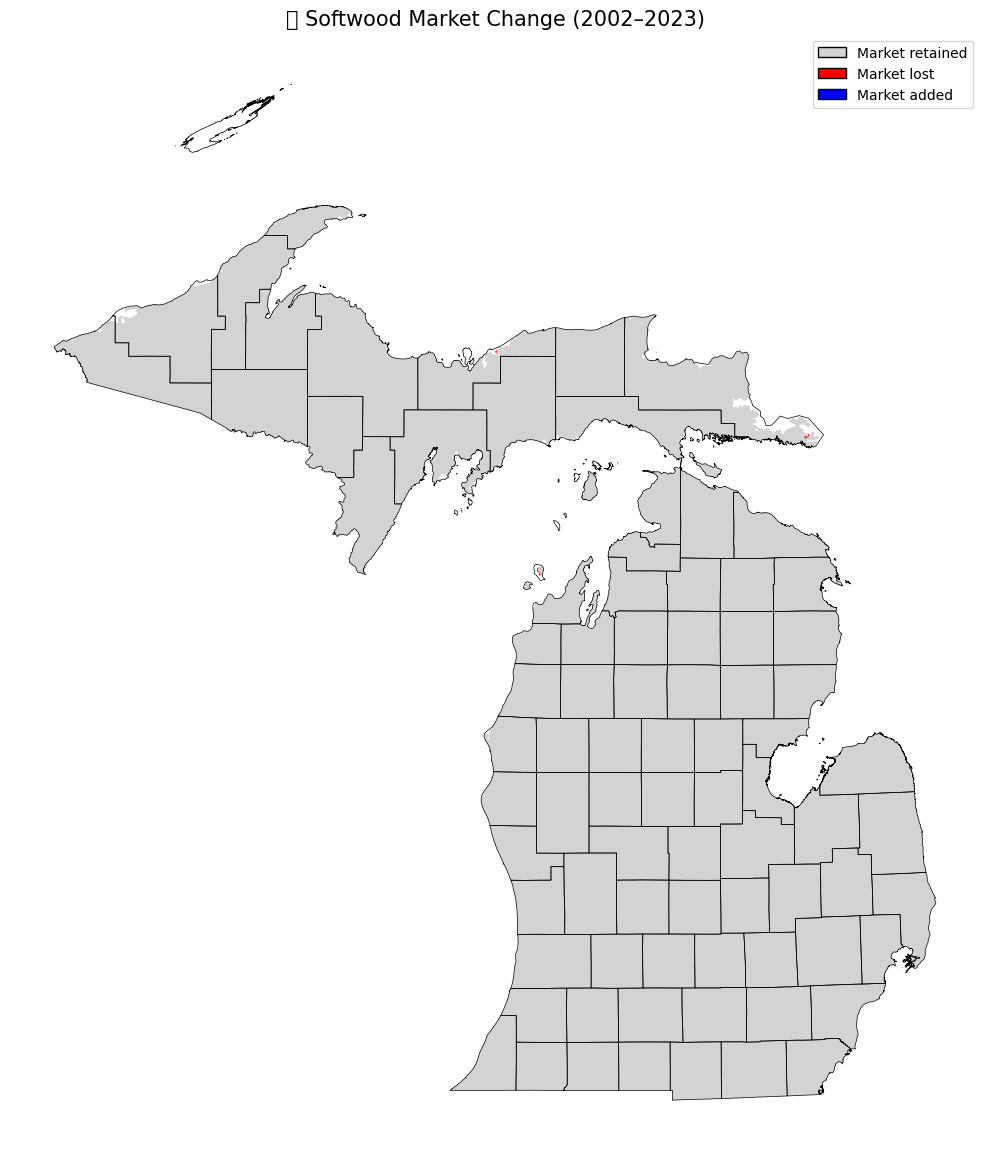

✅ Saved shapefiles for softwood 2002–2023:
- Retained: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\softwood_market_retained_2002_2023.shp
- Lost: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\softwood_market_lost_2002_2023.shp
- Added: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\softwood_market_added_2002_2023.shp


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
base_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps"

michigan_path = os.path.join(base_dir, "michigan_counties.shp")
path_2002 = os.path.join(base_dir, "softwood_2002.shp")
path_2023 = os.path.join(base_dir, "softwood_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g02 = gpd.read_file(path_2002)
g23 = gpd.read_file(path_2023)

# === Reproject all to same CRS
target_crs = mi.crs
g02 = g02.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Restrict to Michigan boundary
mi_union = mi.unary_union.buffer(0)
geom02 = gpd.overlay(g02.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Market change geometry
retained_geom = geom02.intersection(geom23)
lost_geom = geom02.difference(geom23)
added_geom = geom23.difference(geom02)

# === Wrap in GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Clip to Michigan
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Softwood Market Change (2002–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()

# === Save shapefiles helper
def clean_and_save(gdf, filepath):
    gdf_exploded = gdf.explode(index_parts=False)
    gdf_clean = gdf_exploded[gdf_exploded.geometry.type.isin(["Polygon", "MultiPolygon"])]
    if not gdf_clean.empty:
        gdf_clean.to_file(filepath)
    else:
        print(f"⚠️ Skipped saving {filepath} (empty or invalid geometries)")

# # === Save shapefiles
# output_dir = os.path.join(base_dir, "Market_Change_SHP")
# os.makedirs(output_dir, exist_ok=True)

# product = "softwood"
# year1 = "2002"
# year2 = "2023"

# retained_fp = os.path.join(output_dir, f"{product}_market_retained_{year1}_{year2}.shp")
# lost_fp     = os.path.join(output_dir, f"{product}_market_lost_{year1}_{year2}.shp")
# added_fp    = os.path.join(output_dir, f"{product}_market_added_{year1}_{year2}.shp")

# clean_and_save(retained, retained_fp)
# clean_and_save(lost, lost_fp)
# clean_and_save(added, added_fp)

# print(f"✅ Saved shapefiles for {product} {year1}–{year2}:\n- Retained: {retained_fp}\n- Lost: {lost_fp}\n- Added: {added_fp}")


C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\3416876109.py:29: UserWarning: `keep_geom_type=True` in overlay resulted in 145 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
C:\Users\khanalna\AppData\Local\Temp\ipykernel_18908\3416876109.py:66: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khanalna\AppData\Local\anaconda3\envs\rstools_ssmart\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


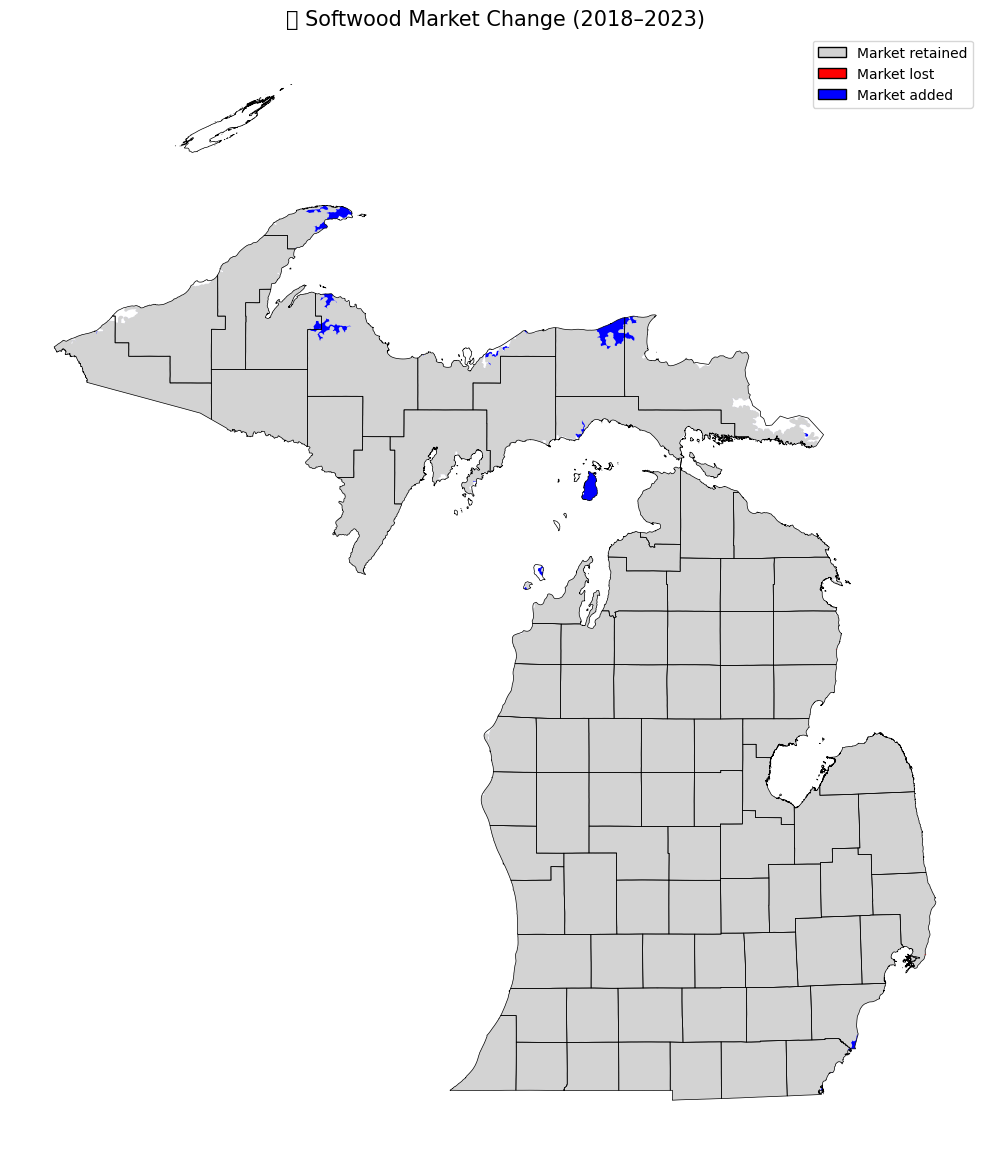

✅ Saved shapefiles for softwood 2018–2023:
- Retained: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\softwood_market_retained_2018_2023.shp
- Lost: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\softwood_market_lost_2018_2023.shp
- Added: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps\Market_Change_SHP\softwood_market_added_2018_2023.shp


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from matplotlib.patches import Patch
import os
from shapely.geometry import Polygon, MultiPolygon

# === File paths ===
base_dir = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\June 25\MI Market Coverage Maps"

michigan_path = os.path.join(base_dir, "michigan_counties.shp")
path_2018 = os.path.join(base_dir, "softwood_2018.shp")
path_2023 = os.path.join(base_dir, "softwood_2023.shp")

# === Load shapefiles ===
mi = gpd.read_file(michigan_path)
g18 = gpd.read_file(path_2018)
g23 = gpd.read_file(path_2023)

# === Reproject to common CRS
target_crs = mi.crs
g18 = g18.to_crs(target_crs)
g23 = g23.to_crs(target_crs)
mi = mi.to_crs(target_crs)

# === Clip to Michigan
mi_union = mi.unary_union.buffer(0)
geom18 = gpd.overlay(g18.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)
geom23 = gpd.overlay(g23.dissolve(), mi, how="intersection").geometry.unary_union.buffer(0)

# === Market change calculations
retained_geom = geom18.intersection(geom23)
lost_geom = geom18.difference(geom23)
added_geom = geom23.difference(geom18)

# === Convert to GeoDataFrames
retained = gpd.GeoDataFrame(geometry=[retained_geom], crs=target_crs)
lost = gpd.GeoDataFrame(geometry=[lost_geom], crs=target_crs)
added = gpd.GeoDataFrame(geometry=[added_geom], crs=target_crs)

# === Clean geometries
for gdf in [retained, lost, added]:
    gdf['geometry'] = gdf.buffer(0)
    gdf = gdf[gdf.is_valid & ~gdf.is_empty]

# === Final clip
retained = gpd.clip(retained, mi_union)
lost = gpd.clip(lost, mi_union)
added = gpd.clip(added, mi_union)

# === Plotting
fig, ax = plt.subplots(figsize=(10, 12))
mi.boundary.plot(ax=ax, color='black', linewidth=0.5)
retained.plot(ax=ax, color='lightgray')
lost.plot(ax=ax, color='red')
added.plot(ax=ax, color='blue')

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Market retained'),
    Patch(facecolor='red', edgecolor='black', label='Market lost'),
    Patch(facecolor='blue', edgecolor='black', label='Market added')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)
ax.set_title("📉 Softwood Market Change (2018–2023)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()

# # === Save shapefiles helper
# def clean_and_save(gdf, filepath):
#     gdf_exploded = gdf.explode(index_parts=False)
#     gdf_clean = gdf_exploded[gdf_exploded.geometry.type.isin(["Polygon", "MultiPolygon"])]
#     if not gdf_clean.empty:
#         gdf_clean.to_file(filepath)
#     else:
#         print(f"⚠️ Skipped saving {filepath} (empty or invalid geometries)")

# # === Save shapefiles
# output_dir = os.path.join(base_dir, "Market_Change_SHP")
# os.makedirs(output_dir, exist_ok=True)

# product = "softwood"
# year1 = "2018"
# year2 = "2023"

# retained_fp = os.path.join(output_dir, f"{product}_market_retained_{year1}_{year2}.shp")
# lost_fp     = os.path.join(output_dir, f"{product}_market_lost_{year1}_{year2}.shp")
# added_fp    = os.path.join(output_dir, f"{product}_market_added_{year1}_{year2}.shp")

# clean_and_save(retained, retained_fp)
# clean_and_save(lost, lost_fp)
# clean_and_save(added, added_fp)

# print(f"✅ Saved shapefiles for {product} {year1}–{year2}:\n- Retained: {retained_fp}\n- Lost: {lost_fp}\n- Added: {added_fp}")
